## `1) Introduction:` <a class="anchor" id="1"></a>

`Problem - Statement:` Build an efficient Classification Model that should predict whether it Rains Tomorrow or not, using the dataset **Rain in Australia.**

Data source: [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)


## `2) Import Libraries:` <a class="anchor" id="2"></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option("display.max_columns",None)

## `3) Import Data Set`  <a class="anchor" id="3"></a>

In [7]:
rain = pd.read_csv('weatherAUS.csv')

In [8]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## `4) Data Preprocessing`  <a class="anchor" id="4"></a>

In [9]:
rain.shape

(145460, 23)

In [10]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
# categorical data:

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']

#rain.select_dtypes(include=['float64','int64']).columns 

print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


<span style='font-size:15px;'>&#10145; <b>` Cardinality check for Categorical Features:`</b></span>

- Some Machine Learning algorithms e.g. Logistic Regression, Support Vector Machine can not handle categorical variables and expect all variables to be numeric. 


- So, categorical data needs to be encoded to numerical data. Before encoding, we need to make sure that categorical features has minimum cardinality.


- `Cardinality:` The number of unique values in feature column is known as cardinality. Example: A column with hundreds of zip codes is an example of a high cardinality feature


- A high number of unique values within a feature column is known as high cardinality. 


- High cardinality may pose some serious problems in the machine learning model. 


- If a feature column as high cardinality, when we use encoding techniques, then that may cause a significant increase number of dimensions, which is not a good for machine learning problems.


- If there is high cardinality in feature column, then:

    1) Employ `Feature Engineering` to extract new features from the feature which possess high cardinality. (or)

    2) Simply drop the feature, if that feature doesn't add value to model.



In [15]:
# finding cardinality of categorical features:

for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(rain[each_feature].unique())))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


`Date` column has high cardinality which poses several problems to ml model in terms of efficency and also dimenionality of data also increases when converted to numerical data.

`Feature enginerring of Date column to decrease high cardinality.`

In [16]:
# Type conversion of Date Column to datetime type:

rain['Date'] = pd.to_datetime(rain['Date'])

In [17]:
rain['Date'].dtype

dtype('<M8[ns]')

In [18]:
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [19]:
rain.drop('Date', axis = 1, inplace = True)

In [20]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'><b>` Null (or) NaN (or) Missing Values in Data:`</b></span>


The real-world data often has a lot of missing(or null) values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.
<br>

<br>

<span style='font-size:15px;'>&#10145; <b>` Handling Null values in categorical features:`</b></span>

In [21]:
# categorical data: 

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [22]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
#rain.select_dtypes(include=['float64','int64']).columns 
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


`Checking for Null values:`

In [23]:
rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [24]:
# list of categorical features which has null values:

categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]

`Filling the missing(Null) categorical features with most frequent value(mode)`

In [25]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [26]:
rain[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

<br>

<span style='font-size:15px;'>&#10145; <b>` Handling Null values in numerical features:`</b></span>

In [27]:
# checking null values in numerical features

rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

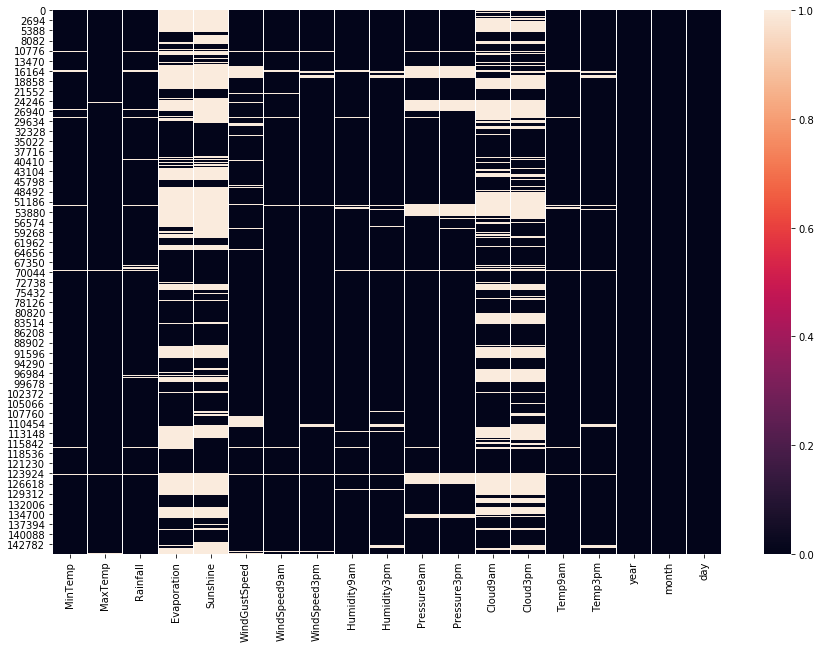

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(rain[numerical_features].isnull(),linecolor='white')

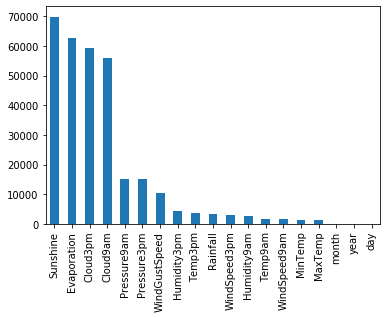

In [29]:
# visualizing the Null values in Numerical Features:

rain[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

<br>

`Null values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the null values with mean values, then outliers in numerical features need to be addressed properly.`

<br>

<span style='font-size:15px;'>&#10145; <b>` Checking for outliers in Numerical Features`</b></span>

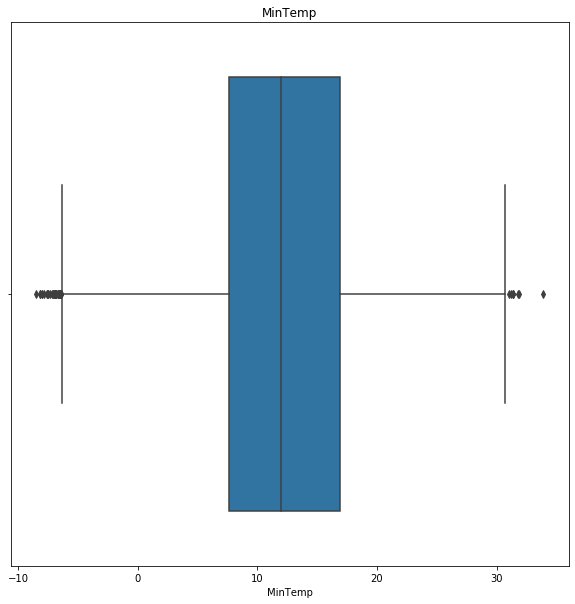

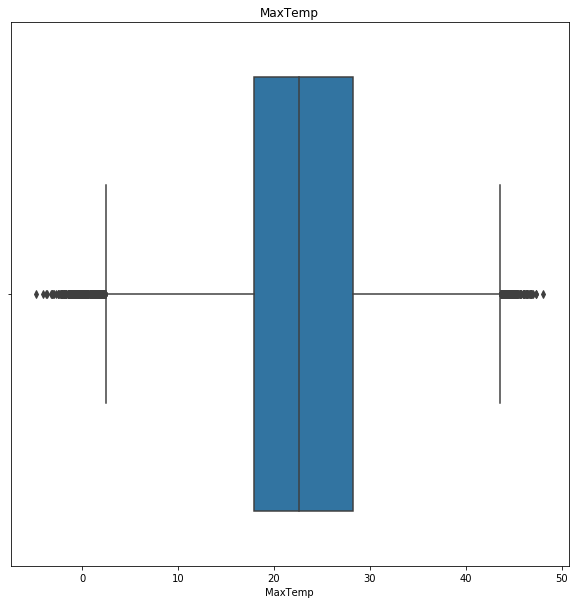

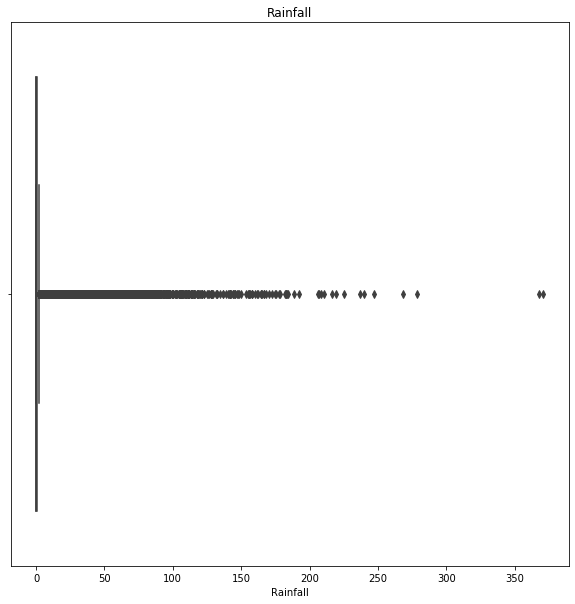

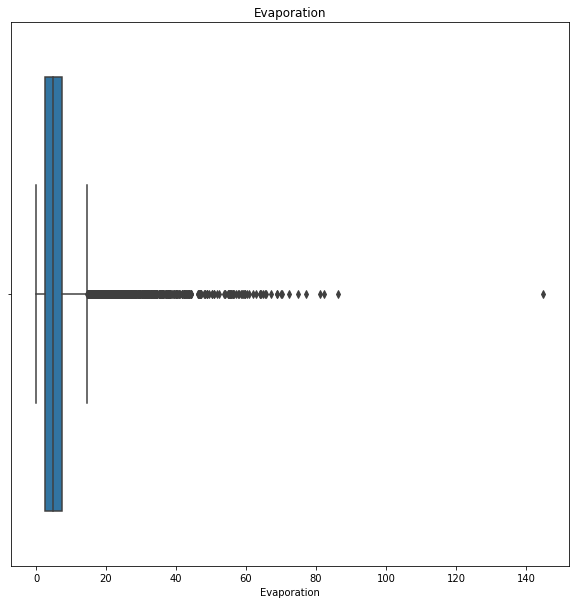

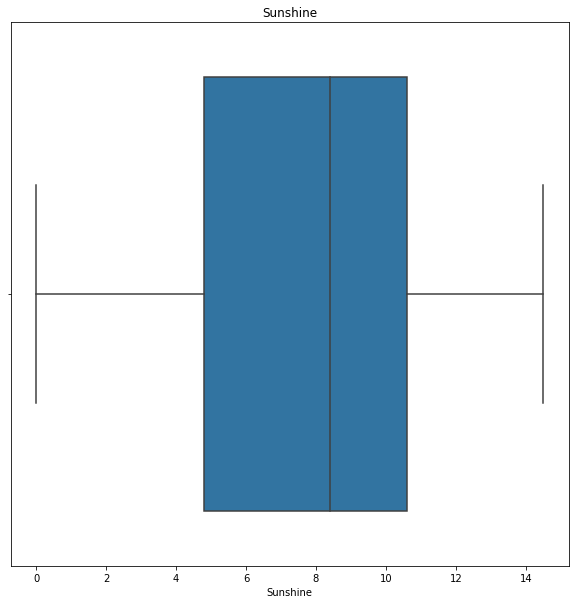

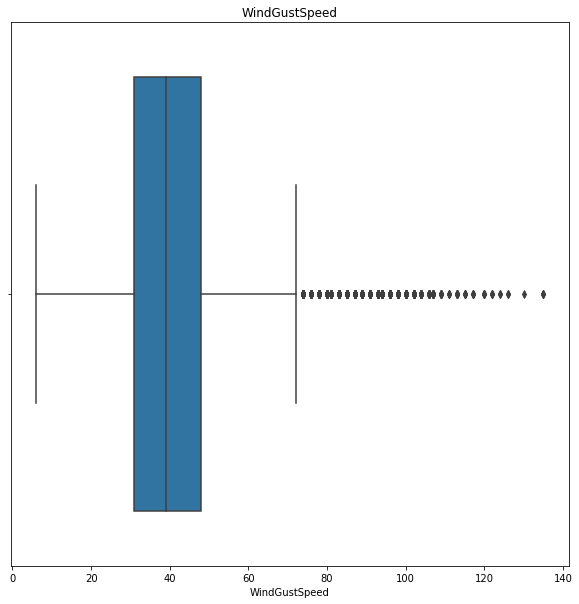

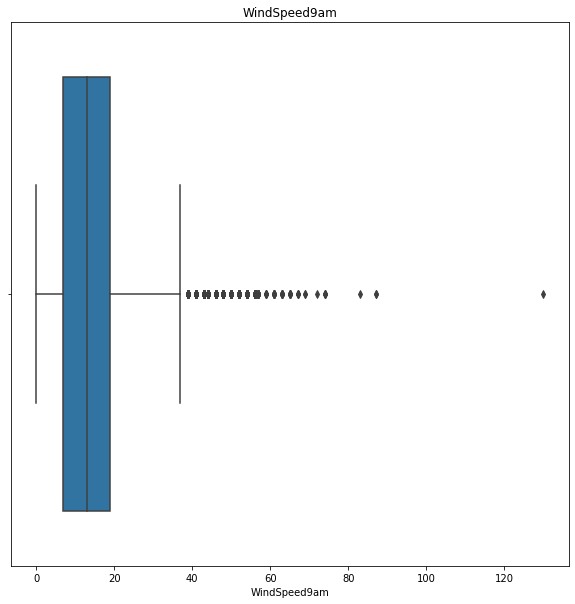

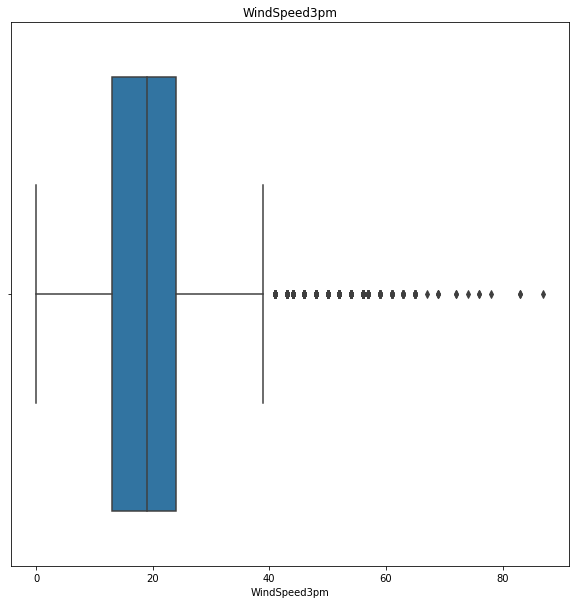

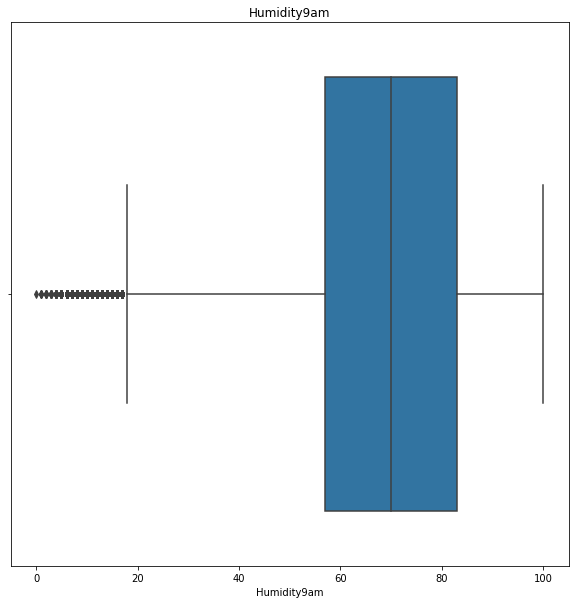

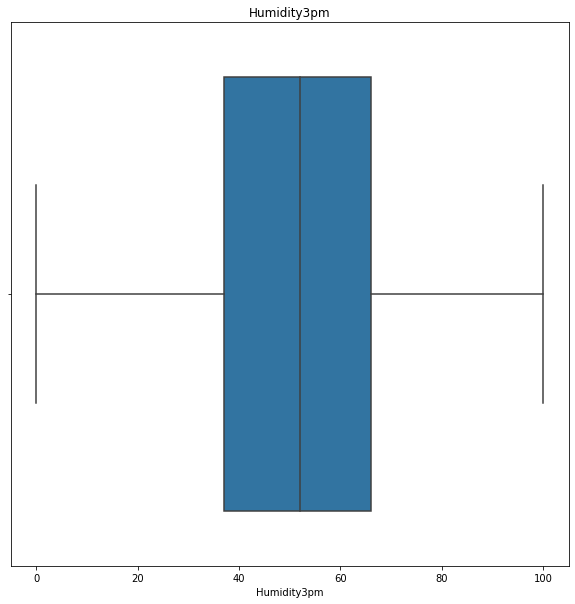

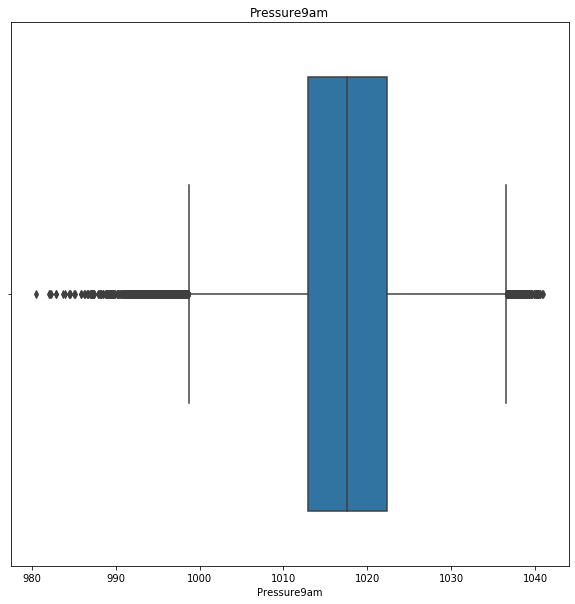

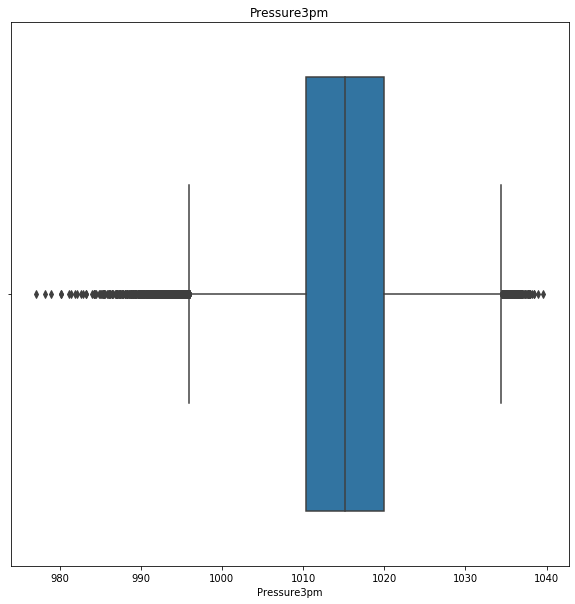

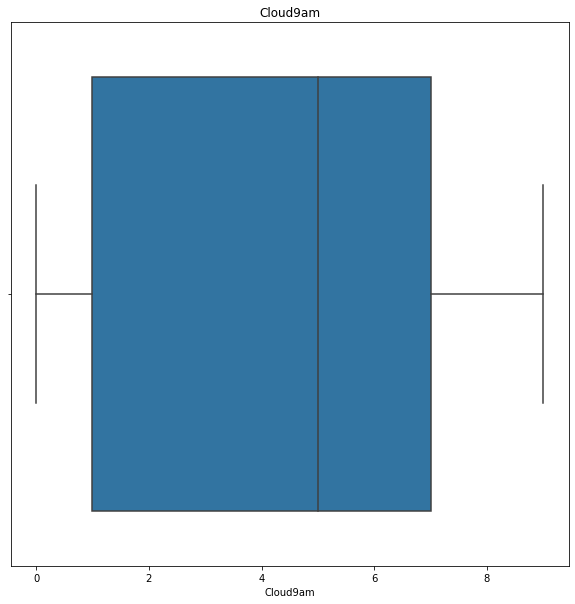

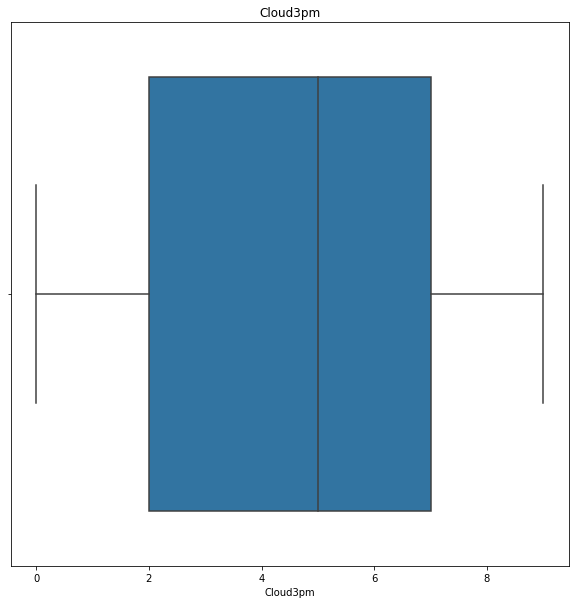

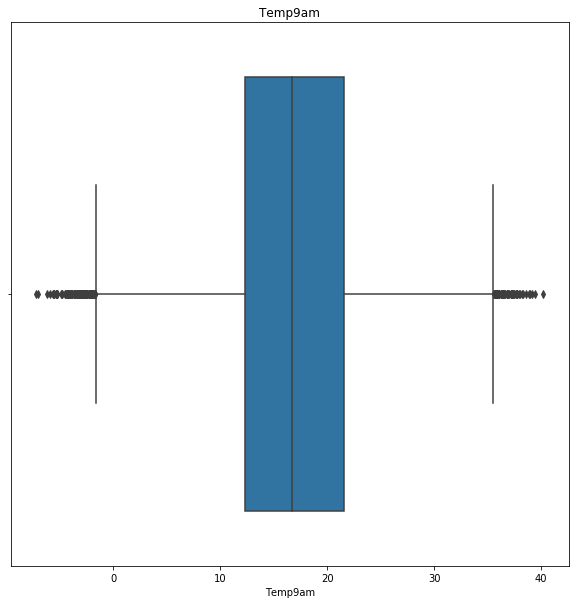

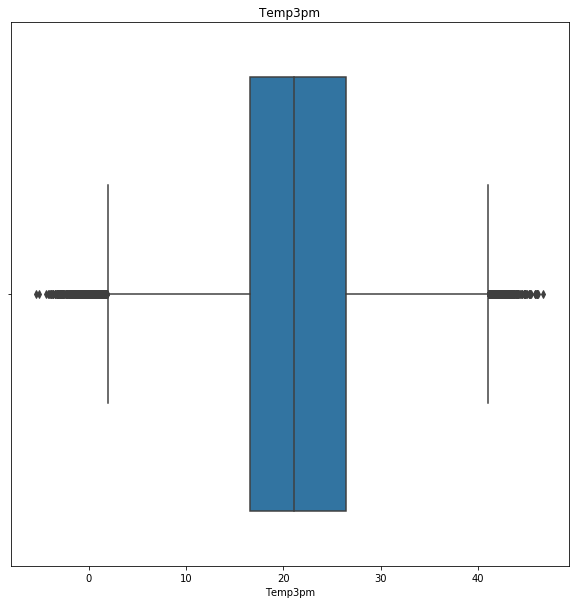

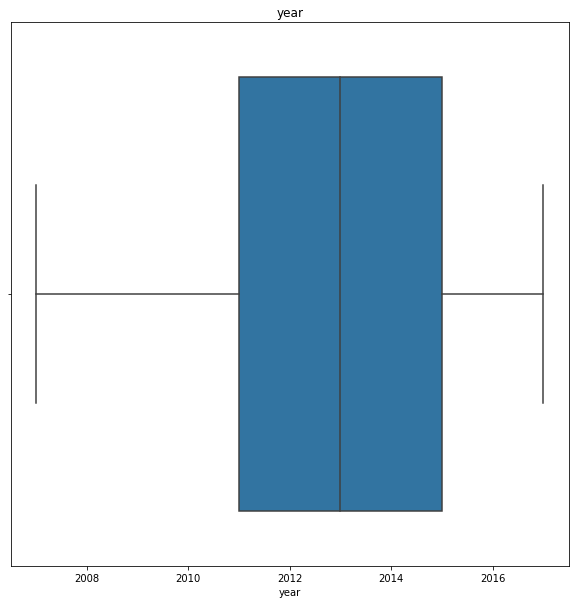

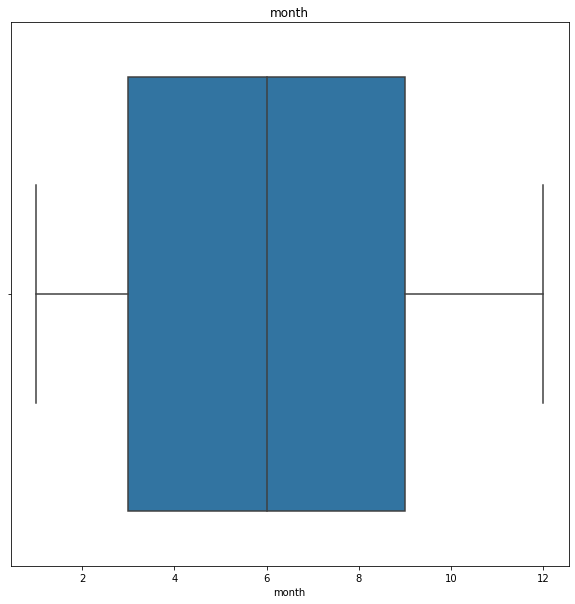

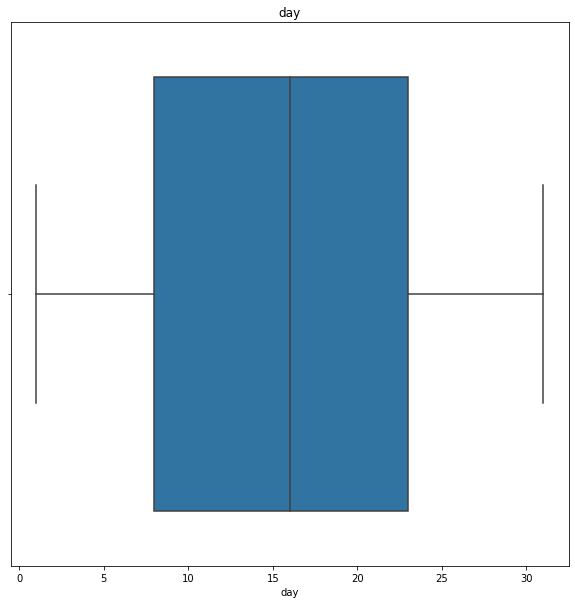

In [30]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)
    

In [31]:
# checking for outliers using the statistical formulas:

rain[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


<br>

`Outlier Treatment to remove outliers from Numerical Features:`

In [32]:
# features which has outliers:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [33]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

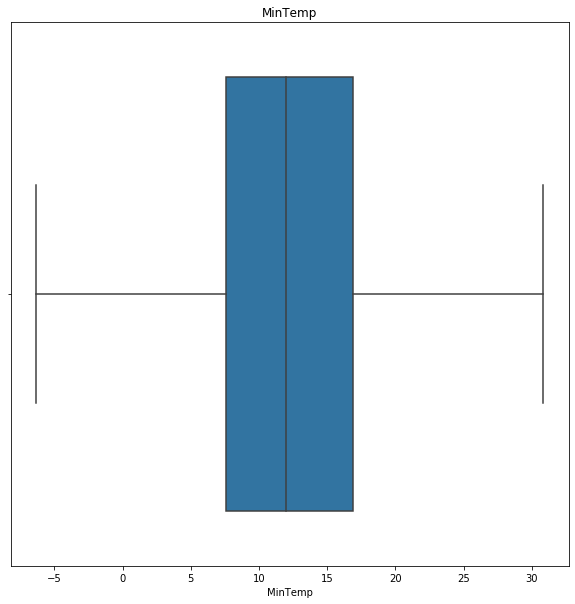

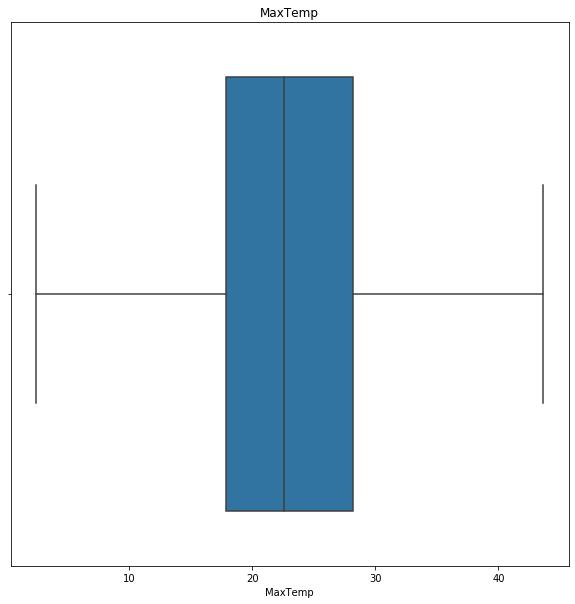

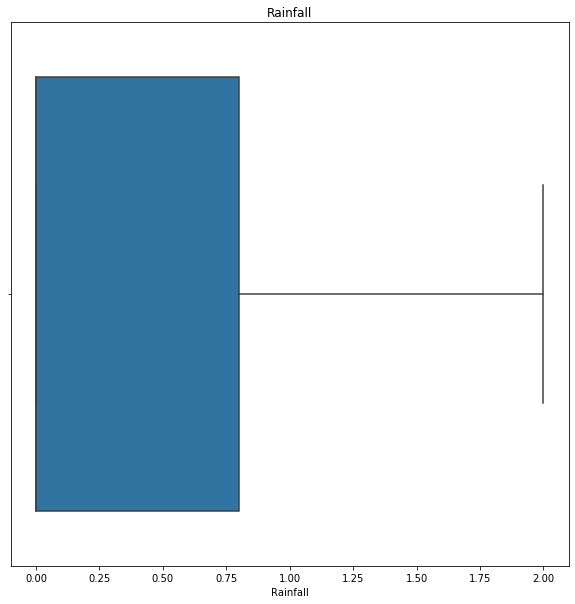

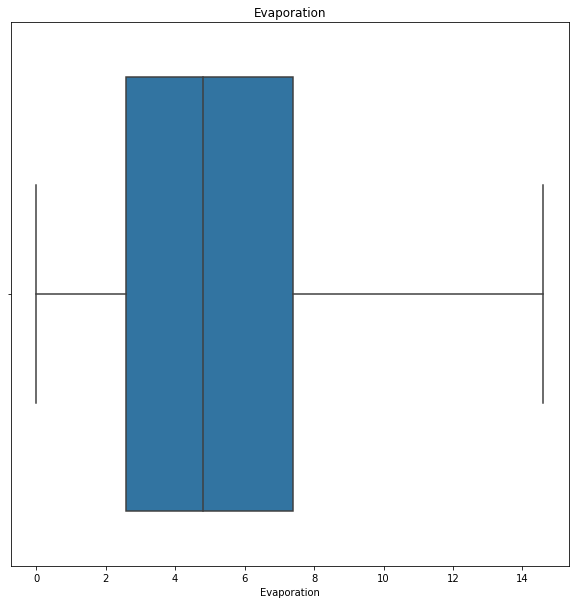

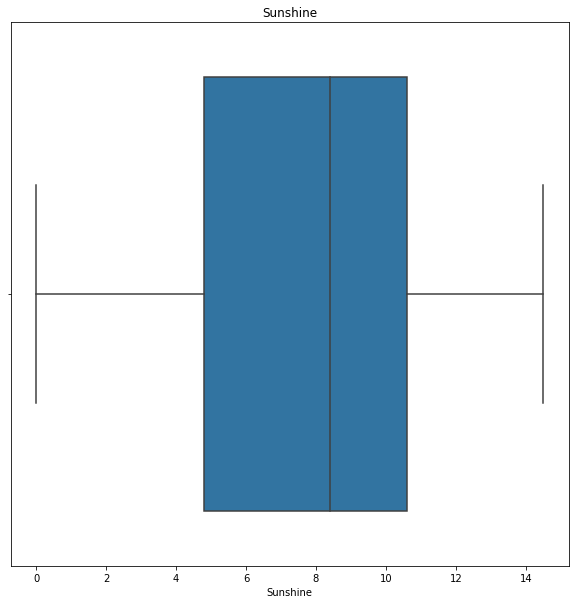

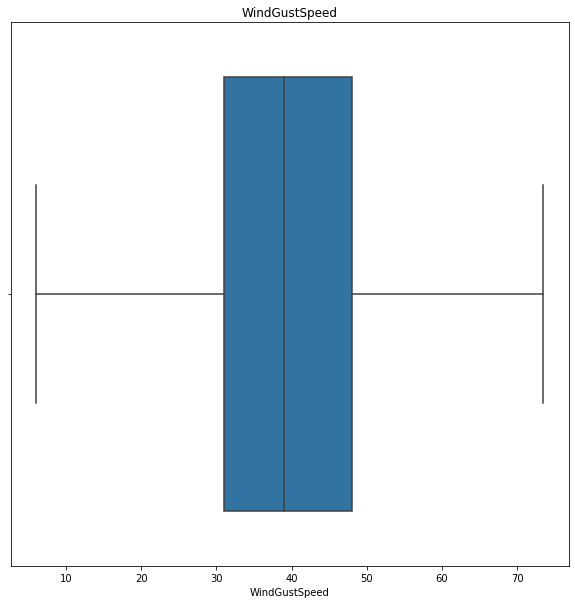

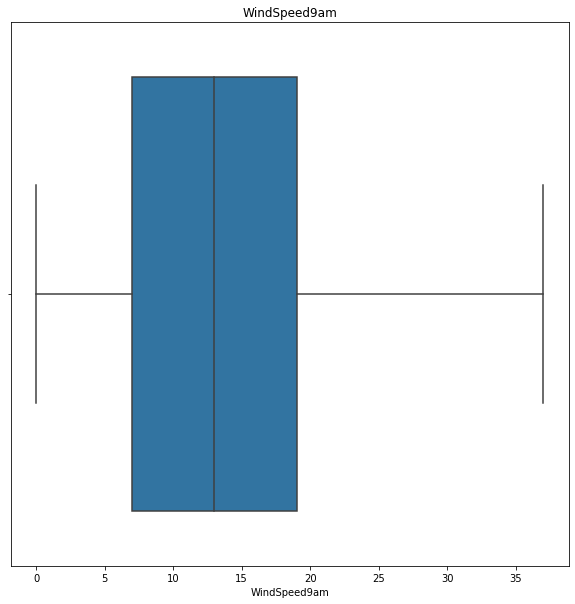

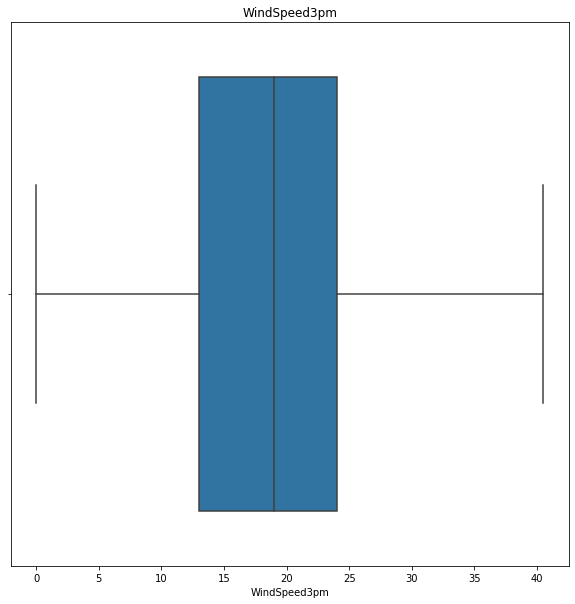

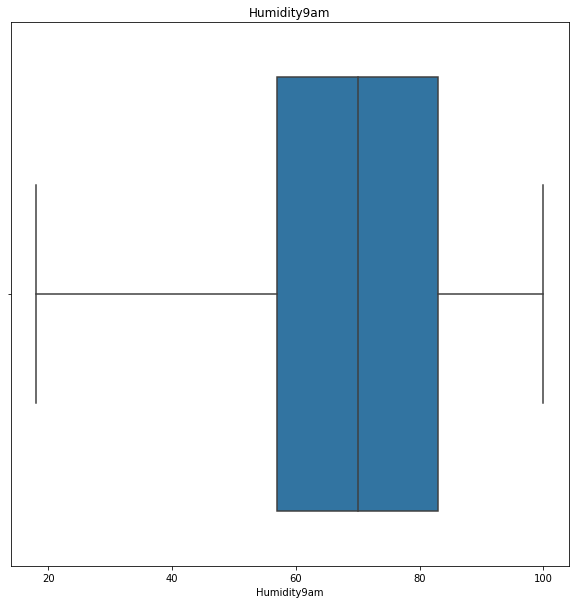

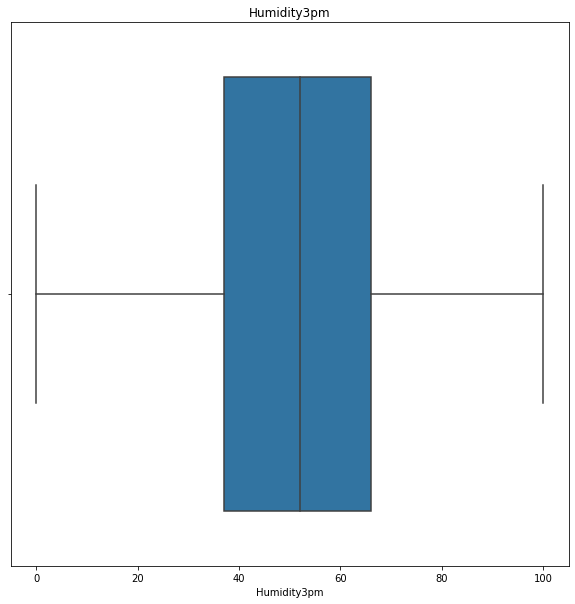

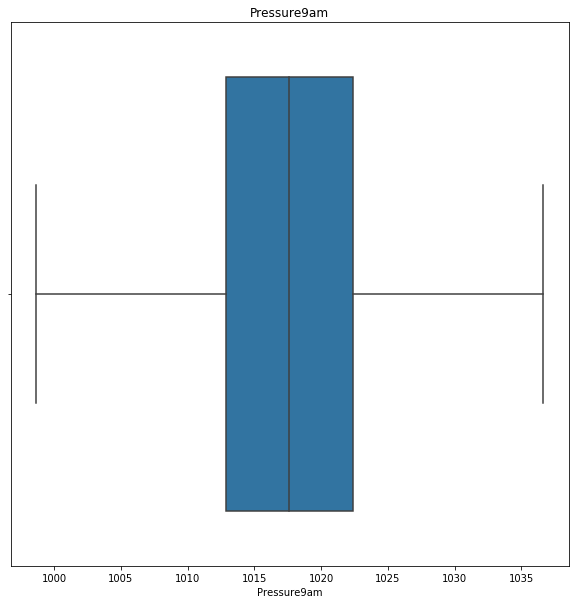

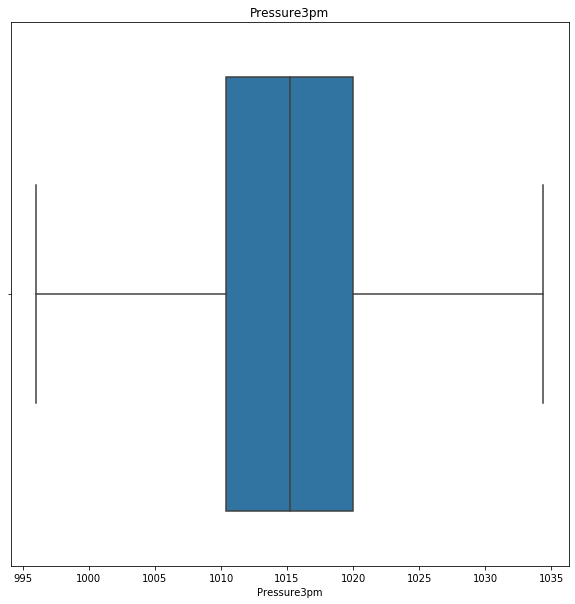

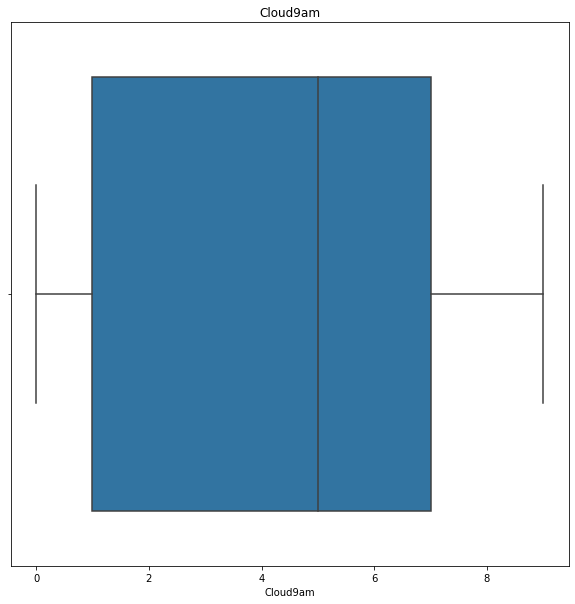

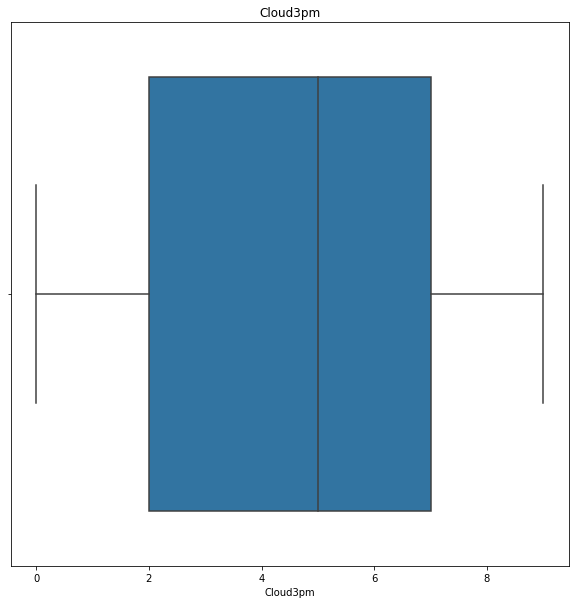

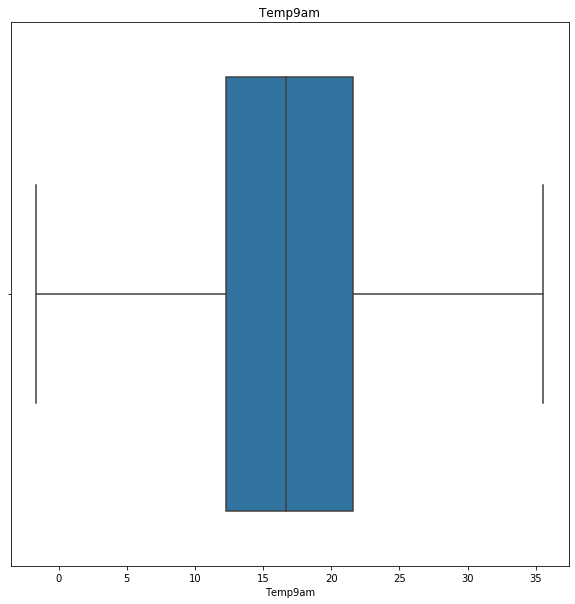

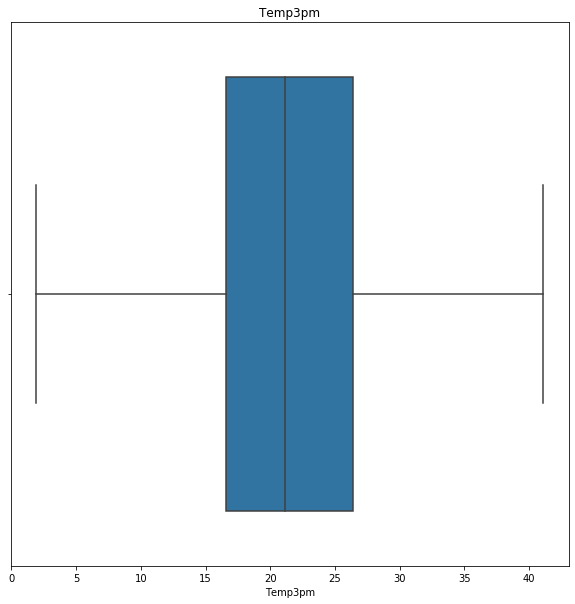

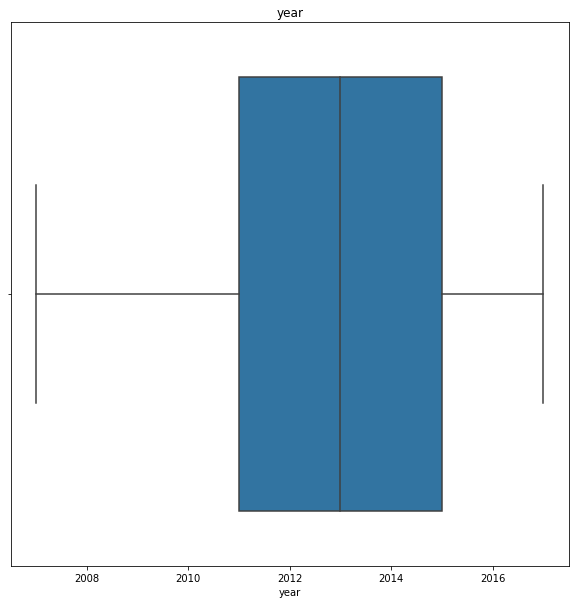

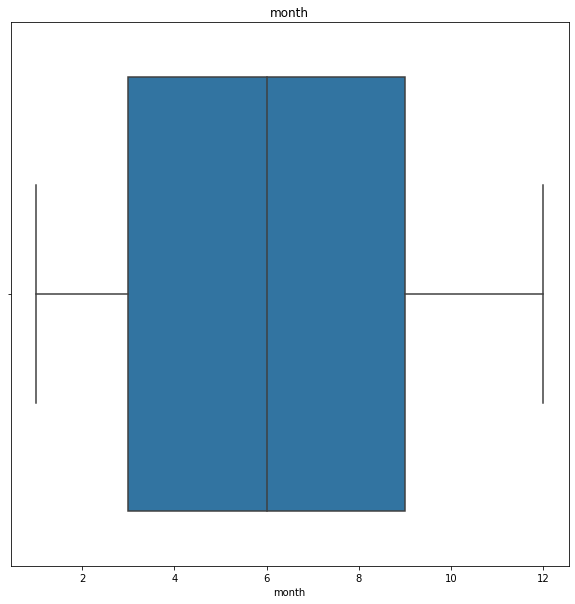

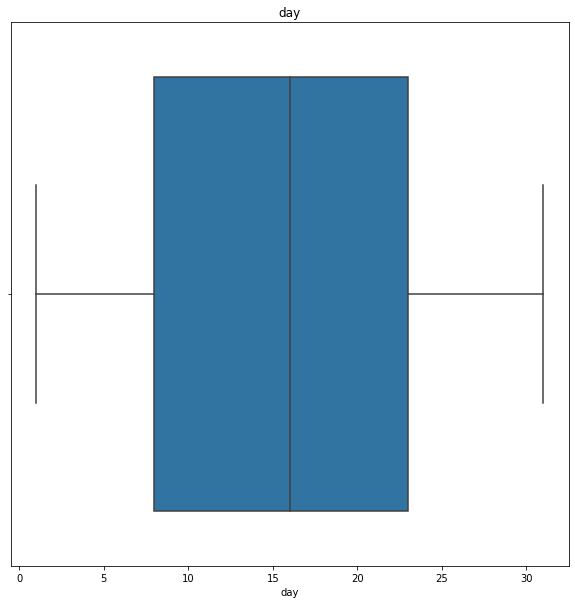

In [34]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)

<br>

`Imputing null values in numerical features using mean:`

In [35]:
# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [36]:
# Filling null values uisng mean: 

for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [37]:
rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [38]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'>&#10145; <b>` Univariate Analysis`</b></span>

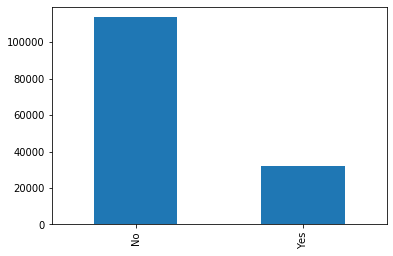

In [39]:
# Exploring RainTomorrow label

rain['RainTomorrow'].value_counts().plot(kind='bar')

Looks like Target variable is imbalanced. It has more 'No' values. If data is imbalanced, then it might decrease performance of model. As this data is released by the meteorological department of Australia, it doesn't make any sense when we try to balance target variable, because the truthfullness of data might descreases. So, let me keep it as it is.

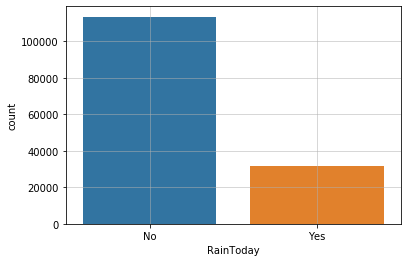

In [40]:
#Exploring RainToday Variable:

sns.countplot(data=rain, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

<span style='font-size:15px;'>&#10145; <b>` Multivariate Analysis`</b></span>

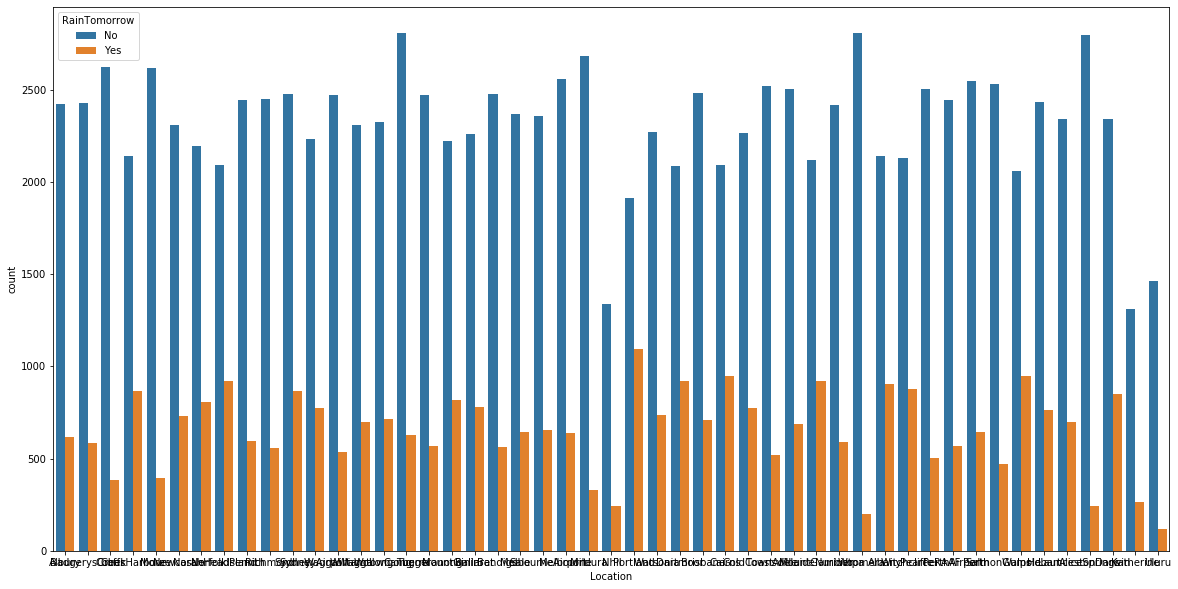

In [42]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain)

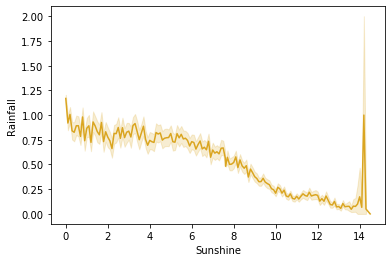

In [43]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F85ABDEFC8>,
      dtype=object)

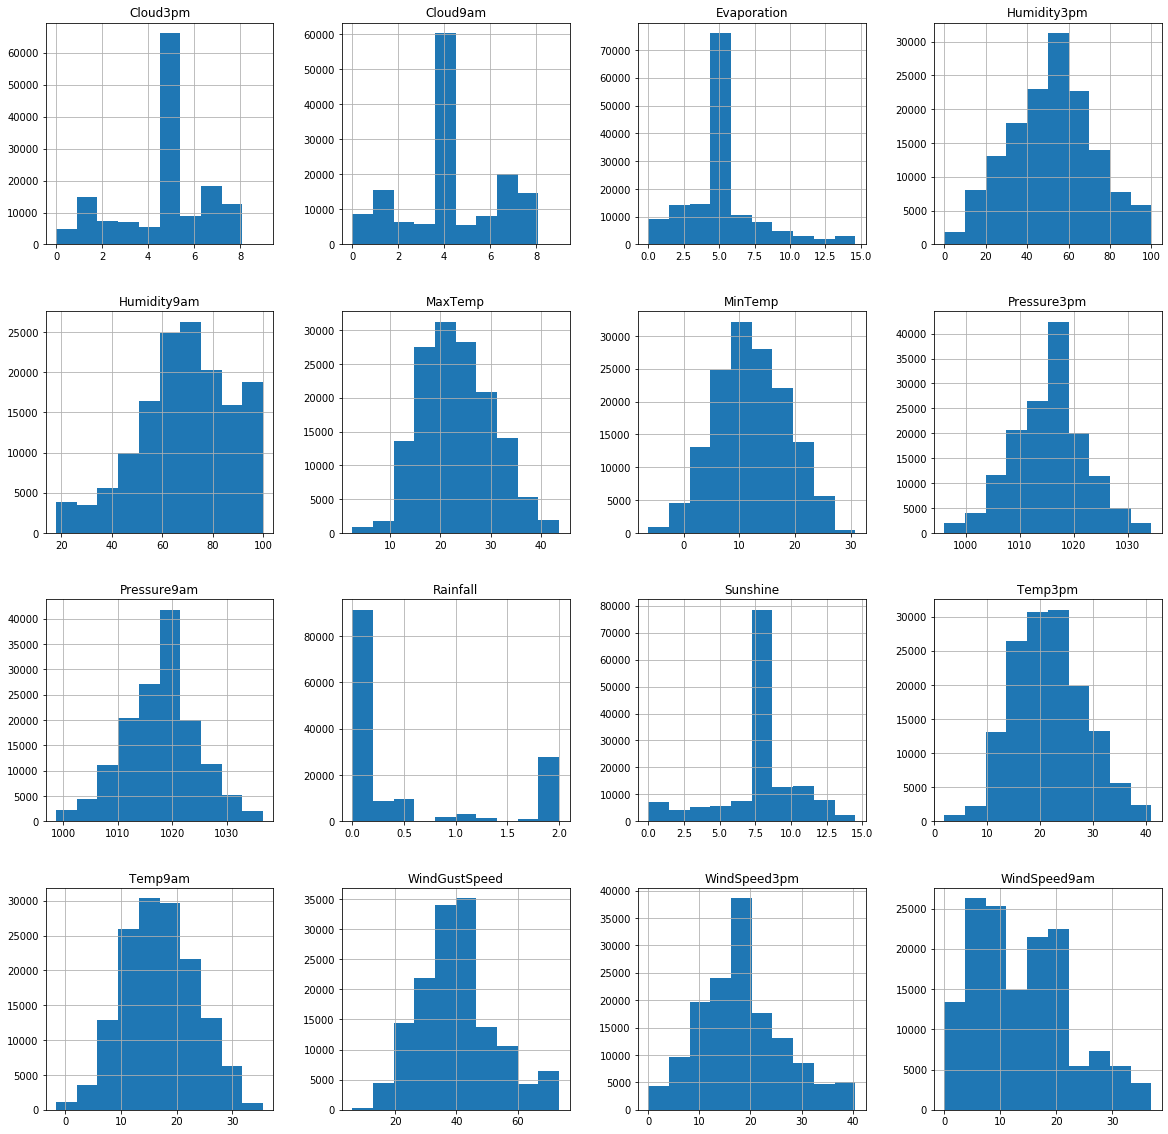

In [44]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
rain[num_features].hist(bins=10,figsize=(20,20))

<span style='font-size:15px;'>&#10145; <b>` Correlation:`</b></span>


    - Correlation is a statistic that helps to measure the strength of relationship between features. 

In [45]:
rain.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.733392,0.051203,0.404632,0.051295,0.180336,0.177534,0.177176,-0.230718,0.006033,-0.428982,-0.437161,0.062154,0.016724,0.897765,0.699147,0.043007,-0.202744,0.002342
MaxTemp,0.733392,1.000000,-0.255978,0.501465,0.329668,0.073229,0.017140,0.053117,-0.497111,-0.498544,-0.314920,-0.402168,-0.225781,-0.213214,0.879365,0.968905,0.061734,-0.163190,0.000655
Rainfall,0.051203,-0.255978,1.000000,-0.188968,-0.261889,0.151293,0.102499,0.080050,0.387454,0.406205,-0.179751,-0.095155,0.270881,0.234198,-0.114011,-0.260283,-0.014480,0.011964,0.003290
Evaporation,0.404632,0.501465,-0.188968,1.000000,0.339024,0.170903,0.157072,0.113275,-0.421244,-0.318548,-0.248039,-0.269624,-0.168963,-0.167229,0.477917,0.485623,0.060169,-0.024221,-0.005429
Sunshine,0.051295,0.329668,-0.261889,0.339024,1.000000,-0.019597,0.006782,0.041356,-0.349320,-0.443121,0.029821,-0.016637,-0.532497,-0.553853,0.208714,0.347710,0.006072,0.017589,-0.000286
WindGustSpeed,0.180336,0.073229,0.151293,0.170903,-0.019597,1.000000,0.578562,0.659350,-0.214349,-0.028868,-0.424191,-0.381720,0.050920,0.078253,0.154054,0.039421,-0.029014,0.058281,-0.009631
WindSpeed9am,0.177534,0.017140,0.102499,0.157072,0.006782,0.578562,1.000000,0.507874,-0.273399,-0.033036,-0.214427,-0.164884,0.018119,0.039635,0.131738,0.007197,-0.017855,0.051481,-0.008879
WindSpeed3pm,0.177176,0.053117,0.080050,0.113275,0.041356,0.659350,0.507874,1.000000,-0.146602,0.015137,-0.276327,-0.237763,0.041044,0.018156,0.165858,0.031299,-0.029658,0.058906,-0.010331
Humidity9am,-0.230718,-0.497111,0.387454,-0.421244,-0.349320,-0.214349,-0.273399,-0.146602,1.000000,0.658850,0.133181,0.177319,0.354042,0.273774,-0.468540,-0.489627,0.009745,-0.089070,0.015121
Humidity3pm,0.006033,-0.498544,0.406205,-0.318548,-0.443121,-0.028868,-0.033036,0.015137,0.658850,1.000000,-0.024338,0.050405,0.398762,0.406605,-0.216576,-0.555212,-0.009463,-0.018568,0.012813


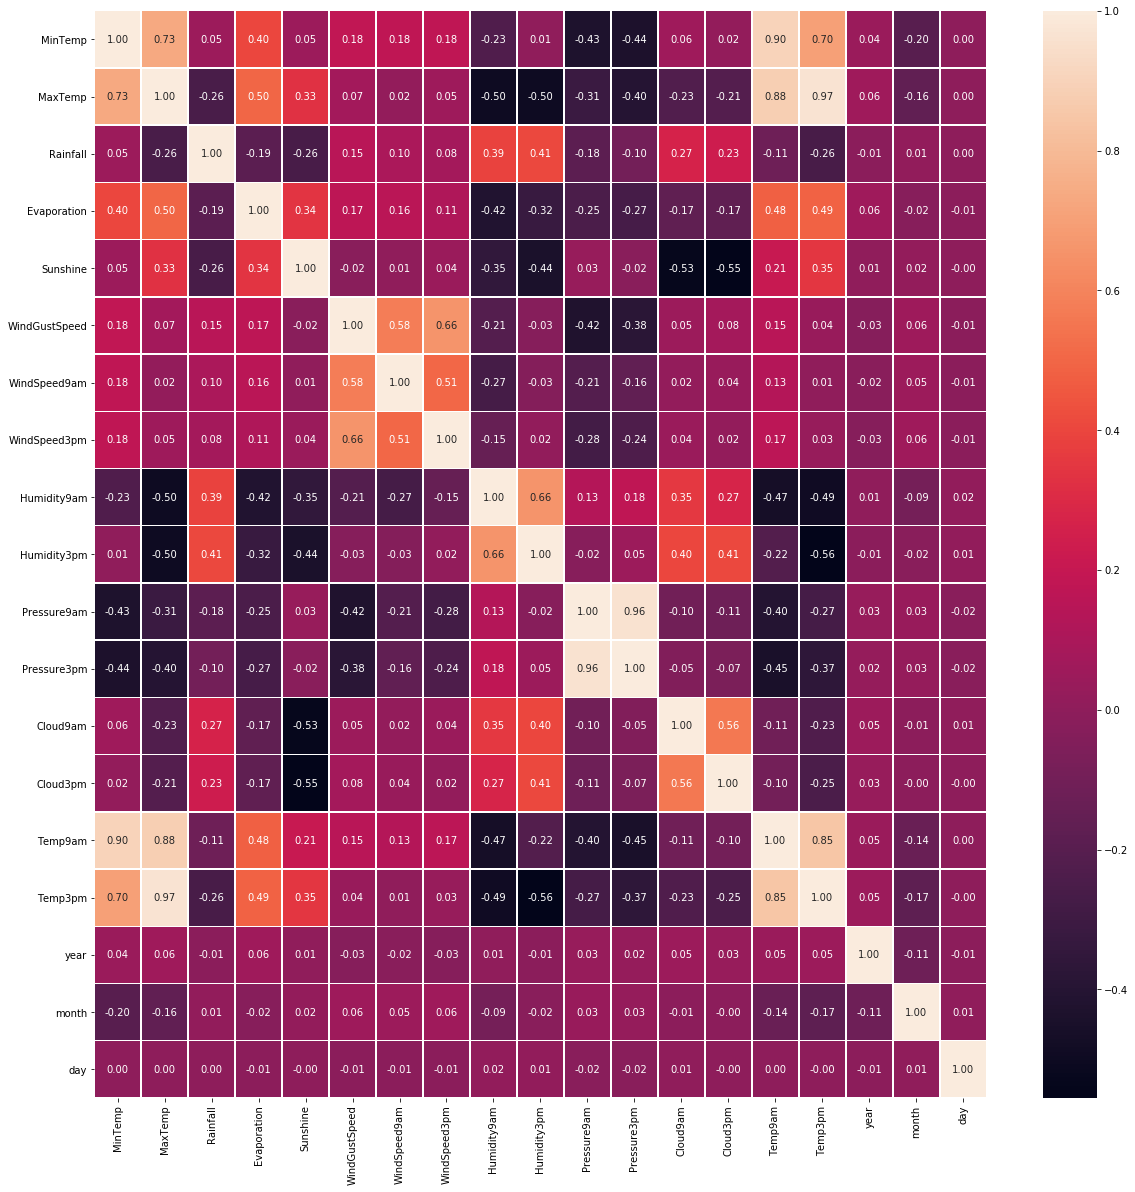

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [47]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'>&#10145; <b>`Encoding of Categorical Features`</b></span>

Most Machine Learning Algorithms like Logistic Regression, Support Vector Machines, K Nearest Neighbours etc. can't handle categorical data. Hence, these categorical data needs to converted to numerical data for modelling, which is called as `Feature Encoding`.

In [48]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [49]:
# Encoding Categorical Features using replace function:

rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

# pd.get_dummies(rain['RainToday'],drop_first = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [50]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict


In [51]:
rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [52]:
rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [53]:
rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [54]:
rain['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [55]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


<br>
<br>

`Spliting data into input features and label`

In [56]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

<span style='font-size:15px;'>&#10145; <b>`Feature Importance:`</b></span>

    - Machine Learning Model performance depends on features that are used to train a model. 
    - Feature importance describes which features are relevant to build a model. 
    - Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are  at predicting a target variable. Feature importance helps in Feature Selection.


In [57]:
# finding feature importance using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [58]:
etr_model.feature_importances_

array([0.03461113, 0.02998314, 0.02899674, 0.04390349, 0.0232547 ,
       0.04430648, 0.02991751, 0.05640557, 0.03053862, 0.03172314,
       0.03107206, 0.03248335, 0.0378947 , 0.19369906, 0.03510281,
       0.05112456, 0.02392256, 0.03574398, 0.0280973 , 0.02832475,
       0.05537687, 0.0307048 , 0.03022299, 0.03258969])

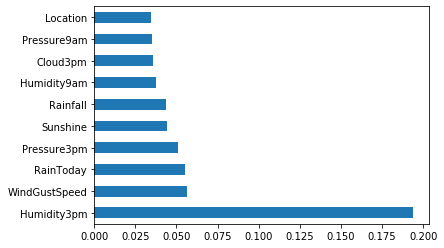

In [59]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [60]:
feature_imp

Location         0.034611
MinTemp          0.029983
MaxTemp          0.028997
Rainfall         0.043903
Evaporation      0.023255
Sunshine         0.044306
WindGustDir      0.029918
WindGustSpeed    0.056406
WindDir9am       0.030539
WindDir3pm       0.031723
WindSpeed9am     0.031072
WindSpeed3pm     0.032483
Humidity9am      0.037895
Humidity3pm      0.193699
Pressure9am      0.035103
Pressure3pm      0.051125
Cloud9am         0.023923
Cloud3pm         0.035744
Temp9am          0.028097
Temp3pm          0.028325
RainToday        0.055377
year             0.030705
month            0.030223
day              0.032590
dtype: float64

## `5) Split Data into Training and Testing Set`  <a class="anchor" id=""></a>

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [62]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


## `6) Feature Scaling`  <a class="anchor" id=""></a>

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [64]:
X_test = scaler.transform(X_test)

`Save the Scaler object to Standardize Real Time Data feeded by users for prediction`

In [65]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## `7) Model Building`  <a class="anchor" id=""></a>
    - Model Training
    - Model Testing 
    - Evaluating Model Performance using Accuracy, Confusion Matrix, Classification Report, RUC-AUC curve
    - Finding whether model performance can be improved using Cross Validation Score

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<span style='font-size:15px;'><b>`(i) Logistic Regression`</b></span>

`Model Training:`

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [69]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 1.1078617572784424


`Model Testing:`

In [70]:
y_pred = classifier_logreg.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8444933315000688


`Checking for Overfitting and Under Fitting:`

In [73]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


_`Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.`_

In [74]:
# confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[21536  1190]
 [ 3334  3032]]


In [75]:
# Classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [76]:
# predicting probabilities:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [77]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

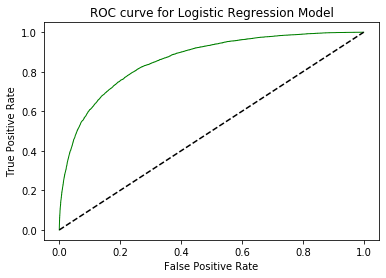

In [78]:
# Plotting ROC curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [79]:
# finding ROC-AUC score:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7119586532221237


<br>

`Finding whether model performance can be improved using Cross Validation Score:`

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84338747 0.84235628 0.84691072 0.84067374 0.84359558]


In [81]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8433847578355673


_`The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation.`_

<hr style="height:1px">

<span style='font-size:15px;'><b>`(ii) Cat Boost`</b></span>

In [82]:
from catboost import CatBoostClassifier

`Model Training:`

In [83]:
start_time = time.time()
cat_classifier = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat_classifier.fit(X_train, y_train)
end_time = time.time()

Learning rate set to 0.041591
0:	total: 211ms	remaining: 7m 2s
1:	total: 233ms	remaining: 3m 53s
2:	total: 252ms	remaining: 2m 48s
3:	total: 271ms	remaining: 2m 15s
4:	total: 290ms	remaining: 1m 55s
5:	total: 310ms	remaining: 1m 42s
6:	total: 329ms	remaining: 1m 33s
7:	total: 350ms	remaining: 1m 27s
8:	total: 372ms	remaining: 1m 22s
9:	total: 393ms	remaining: 1m 18s
10:	total: 422ms	remaining: 1m 16s
11:	total: 455ms	remaining: 1m 15s
12:	total: 484ms	remaining: 1m 14s
13:	total: 503ms	remaining: 1m 11s
14:	total: 560ms	remaining: 1m 14s
15:	total: 602ms	remaining: 1m 14s
16:	total: 625ms	remaining: 1m 12s
17:	total: 647ms	remaining: 1m 11s
18:	total: 669ms	remaining: 1m 9s
19:	total: 690ms	remaining: 1m 8s
20:	total: 720ms	remaining: 1m 7s
21:	total: 745ms	remaining: 1m 6s
22:	total: 774ms	remaining: 1m 6s
23:	total: 802ms	remaining: 1m 6s
24:	total: 825ms	remaining: 1m 5s
25:	total: 846ms	remaining: 1m 4s
26:	total: 867ms	remaining: 1m 3s
27:	total: 887ms	remaining: 1m 2s
28:	total: 

239:	total: 5.65s	remaining: 41.4s
240:	total: 5.68s	remaining: 41.4s
241:	total: 5.7s	remaining: 41.4s
242:	total: 5.72s	remaining: 41.4s
243:	total: 5.74s	remaining: 41.3s
244:	total: 5.76s	remaining: 41.3s
245:	total: 5.78s	remaining: 41.2s
246:	total: 5.8s	remaining: 41.2s
247:	total: 5.83s	remaining: 41.2s
248:	total: 5.86s	remaining: 41.2s
249:	total: 5.88s	remaining: 41.1s
250:	total: 5.9s	remaining: 41.1s
251:	total: 5.92s	remaining: 41.1s
252:	total: 5.94s	remaining: 41s
253:	total: 5.96s	remaining: 41s
254:	total: 5.98s	remaining: 40.9s
255:	total: 6s	remaining: 40.9s
256:	total: 6.03s	remaining: 40.9s
257:	total: 6.05s	remaining: 40.8s
258:	total: 6.07s	remaining: 40.8s
259:	total: 6.09s	remaining: 40.8s
260:	total: 6.11s	remaining: 40.7s
261:	total: 6.13s	remaining: 40.7s
262:	total: 6.15s	remaining: 40.6s
263:	total: 6.17s	remaining: 40.6s
264:	total: 6.2s	remaining: 40.6s
265:	total: 6.22s	remaining: 40.6s
266:	total: 6.25s	remaining: 40.6s
267:	total: 6.28s	remaining: 40

481:	total: 11.2s	remaining: 35.2s
482:	total: 11.2s	remaining: 35.2s
483:	total: 11.2s	remaining: 35.1s
484:	total: 11.2s	remaining: 35.1s
485:	total: 11.3s	remaining: 35.1s
486:	total: 11.3s	remaining: 35.1s
487:	total: 11.3s	remaining: 35s
488:	total: 11.3s	remaining: 35s
489:	total: 11.4s	remaining: 35s
490:	total: 11.4s	remaining: 35s
491:	total: 11.4s	remaining: 35s
492:	total: 11.4s	remaining: 34.9s
493:	total: 11.4s	remaining: 34.9s
494:	total: 11.5s	remaining: 34.9s
495:	total: 11.5s	remaining: 34.8s
496:	total: 11.5s	remaining: 34.8s
497:	total: 11.5s	remaining: 34.8s
498:	total: 11.5s	remaining: 34.7s
499:	total: 11.6s	remaining: 34.7s
500:	total: 11.6s	remaining: 34.7s
501:	total: 11.6s	remaining: 34.7s
502:	total: 11.6s	remaining: 34.6s
503:	total: 11.7s	remaining: 34.6s
504:	total: 11.7s	remaining: 34.6s
505:	total: 11.7s	remaining: 34.6s
506:	total: 11.7s	remaining: 34.5s
507:	total: 11.8s	remaining: 34.5s
508:	total: 11.8s	remaining: 34.5s
509:	total: 11.8s	remaining: 3

722:	total: 16.7s	remaining: 29.5s
723:	total: 16.7s	remaining: 29.5s
724:	total: 16.7s	remaining: 29.5s
725:	total: 16.8s	remaining: 29.4s
726:	total: 16.8s	remaining: 29.4s
727:	total: 16.8s	remaining: 29.4s
728:	total: 16.8s	remaining: 29.4s
729:	total: 16.9s	remaining: 29.3s
730:	total: 16.9s	remaining: 29.3s
731:	total: 16.9s	remaining: 29.3s
732:	total: 16.9s	remaining: 29.3s
733:	total: 17s	remaining: 29.2s
734:	total: 17s	remaining: 29.2s
735:	total: 17s	remaining: 29.2s
736:	total: 17s	remaining: 29.2s
737:	total: 17s	remaining: 29.1s
738:	total: 17.1s	remaining: 29.1s
739:	total: 17.1s	remaining: 29.1s
740:	total: 17.1s	remaining: 29.1s
741:	total: 17.1s	remaining: 29.1s
742:	total: 17.2s	remaining: 29s
743:	total: 17.2s	remaining: 29s
744:	total: 17.2s	remaining: 29s
745:	total: 17.2s	remaining: 29s
746:	total: 17.3s	remaining: 28.9s
747:	total: 17.3s	remaining: 28.9s
748:	total: 17.3s	remaining: 28.9s
749:	total: 17.3s	remaining: 28.9s
750:	total: 17.3s	remaining: 28.8s
751

965:	total: 22.4s	remaining: 23.9s
966:	total: 22.4s	remaining: 23.9s
967:	total: 22.4s	remaining: 23.9s
968:	total: 22.4s	remaining: 23.9s
969:	total: 22.4s	remaining: 23.8s
970:	total: 22.5s	remaining: 23.8s
971:	total: 22.5s	remaining: 23.8s
972:	total: 22.5s	remaining: 23.8s
973:	total: 22.5s	remaining: 23.7s
974:	total: 22.6s	remaining: 23.7s
975:	total: 22.6s	remaining: 23.7s
976:	total: 22.6s	remaining: 23.7s
977:	total: 22.6s	remaining: 23.7s
978:	total: 22.7s	remaining: 23.6s
979:	total: 22.7s	remaining: 23.6s
980:	total: 22.7s	remaining: 23.6s
981:	total: 22.7s	remaining: 23.6s
982:	total: 22.8s	remaining: 23.5s
983:	total: 22.8s	remaining: 23.5s
984:	total: 22.8s	remaining: 23.5s
985:	total: 22.8s	remaining: 23.5s
986:	total: 22.9s	remaining: 23.5s
987:	total: 22.9s	remaining: 23.4s
988:	total: 22.9s	remaining: 23.4s
989:	total: 22.9s	remaining: 23.4s
990:	total: 23s	remaining: 23.4s
991:	total: 23s	remaining: 23.4s
992:	total: 23s	remaining: 23.3s
993:	total: 23s	remaining:

1199:	total: 27.9s	remaining: 18.6s
1200:	total: 28s	remaining: 18.6s
1201:	total: 28s	remaining: 18.6s
1202:	total: 28s	remaining: 18.6s
1203:	total: 28s	remaining: 18.5s
1204:	total: 28.1s	remaining: 18.5s
1205:	total: 28.1s	remaining: 18.5s
1206:	total: 28.1s	remaining: 18.5s
1207:	total: 28.1s	remaining: 18.4s
1208:	total: 28.2s	remaining: 18.4s
1209:	total: 28.2s	remaining: 18.4s
1210:	total: 28.2s	remaining: 18.4s
1211:	total: 28.2s	remaining: 18.4s
1212:	total: 28.2s	remaining: 18.3s
1213:	total: 28.3s	remaining: 18.3s
1214:	total: 28.3s	remaining: 18.3s
1215:	total: 28.3s	remaining: 18.3s
1216:	total: 28.3s	remaining: 18.2s
1217:	total: 28.4s	remaining: 18.2s
1218:	total: 28.4s	remaining: 18.2s
1219:	total: 28.4s	remaining: 18.2s
1220:	total: 28.4s	remaining: 18.1s
1221:	total: 28.5s	remaining: 18.1s
1222:	total: 28.5s	remaining: 18.1s
1223:	total: 28.5s	remaining: 18.1s
1224:	total: 28.5s	remaining: 18.1s
1225:	total: 28.6s	remaining: 18s
1226:	total: 28.6s	remaining: 18s
1227

1434:	total: 33.6s	remaining: 13.2s
1435:	total: 33.7s	remaining: 13.2s
1436:	total: 33.7s	remaining: 13.2s
1437:	total: 33.7s	remaining: 13.2s
1438:	total: 33.7s	remaining: 13.2s
1439:	total: 33.8s	remaining: 13.1s
1440:	total: 33.8s	remaining: 13.1s
1441:	total: 33.8s	remaining: 13.1s
1442:	total: 33.8s	remaining: 13.1s
1443:	total: 33.9s	remaining: 13s
1444:	total: 33.9s	remaining: 13s
1445:	total: 33.9s	remaining: 13s
1446:	total: 33.9s	remaining: 13s
1447:	total: 34s	remaining: 12.9s
1448:	total: 34s	remaining: 12.9s
1449:	total: 34s	remaining: 12.9s
1450:	total: 34s	remaining: 12.9s
1451:	total: 34.1s	remaining: 12.9s
1452:	total: 34.1s	remaining: 12.8s
1453:	total: 34.1s	remaining: 12.8s
1454:	total: 34.1s	remaining: 12.8s
1455:	total: 34.2s	remaining: 12.8s
1456:	total: 34.2s	remaining: 12.7s
1457:	total: 34.2s	remaining: 12.7s
1458:	total: 34.2s	remaining: 12.7s
1459:	total: 34.3s	remaining: 12.7s
1460:	total: 34.3s	remaining: 12.6s
1461:	total: 34.3s	remaining: 12.6s
1462:	to

1668:	total: 39.3s	remaining: 7.79s
1669:	total: 39.3s	remaining: 7.77s
1670:	total: 39.4s	remaining: 7.75s
1671:	total: 39.4s	remaining: 7.72s
1672:	total: 39.4s	remaining: 7.7s
1673:	total: 39.4s	remaining: 7.68s
1674:	total: 39.5s	remaining: 7.65s
1675:	total: 39.5s	remaining: 7.63s
1676:	total: 39.5s	remaining: 7.61s
1677:	total: 39.5s	remaining: 7.59s
1678:	total: 39.6s	remaining: 7.56s
1679:	total: 39.6s	remaining: 7.54s
1680:	total: 39.6s	remaining: 7.52s
1681:	total: 39.6s	remaining: 7.49s
1682:	total: 39.7s	remaining: 7.47s
1683:	total: 39.7s	remaining: 7.45s
1684:	total: 39.7s	remaining: 7.42s
1685:	total: 39.7s	remaining: 7.4s
1686:	total: 39.8s	remaining: 7.38s
1687:	total: 39.8s	remaining: 7.35s
1688:	total: 39.8s	remaining: 7.33s
1689:	total: 39.8s	remaining: 7.31s
1690:	total: 39.9s	remaining: 7.28s
1691:	total: 39.9s	remaining: 7.26s
1692:	total: 39.9s	remaining: 7.24s
1693:	total: 39.9s	remaining: 7.21s
1694:	total: 39.9s	remaining: 7.19s
1695:	total: 40s	remaining: 7.

1902:	total: 45.1s	remaining: 2.3s
1903:	total: 45.1s	remaining: 2.27s
1904:	total: 45.1s	remaining: 2.25s
1905:	total: 45.2s	remaining: 2.23s
1906:	total: 45.2s	remaining: 2.2s
1907:	total: 45.2s	remaining: 2.18s
1908:	total: 45.2s	remaining: 2.15s
1909:	total: 45.2s	remaining: 2.13s
1910:	total: 45.3s	remaining: 2.11s
1911:	total: 45.3s	remaining: 2.08s
1912:	total: 45.3s	remaining: 2.06s
1913:	total: 45.3s	remaining: 2.04s
1914:	total: 45.4s	remaining: 2.01s
1915:	total: 45.4s	remaining: 1.99s
1916:	total: 45.4s	remaining: 1.97s
1917:	total: 45.4s	remaining: 1.94s
1918:	total: 45.5s	remaining: 1.92s
1919:	total: 45.5s	remaining: 1.9s
1920:	total: 45.5s	remaining: 1.87s
1921:	total: 45.5s	remaining: 1.85s
1922:	total: 45.6s	remaining: 1.82s
1923:	total: 45.6s	remaining: 1.8s
1924:	total: 45.6s	remaining: 1.78s
1925:	total: 45.6s	remaining: 1.75s
1926:	total: 45.7s	remaining: 1.73s
1927:	total: 45.7s	remaining: 1.71s
1928:	total: 45.7s	remaining: 1.68s
1929:	total: 45.7s	remaining: 1.

In [84]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 49.45407462120056


`Model Testing:`

In [85]:
y_pred_cat = cat_classifier.predict(X_test)

In [86]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_cat)))

Accuracy Score: 0.8647050735597415


`Checking for Overfitting and Under Fitting:`

In [87]:
print("Train Data Score: {}".format(cat_classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(cat_classifier.score(X_test, y_test)))

Train Data Score: 0.8922384160593978
Test Data Score: 0.8647050735597415


_`Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.`_

In [88]:
# Confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_cat))

Confusion Matrix:

 [[21641  1085]
 [ 2851  3515]]


In [89]:
# classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred_cat))

classification_report:

               precision    recall  f1-score   support

           0       0.88      0.95      0.92     22726
           1       0.76      0.55      0.64      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.86      0.86     29092



In [90]:
# predicting the probabilities:

y_pred_cat_proba = cat_classifier.predict_proba(X_test)

In [91]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve  

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat_proba[:,1])

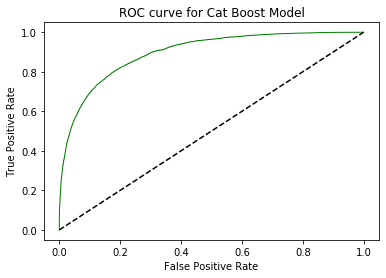

In [92]:
# plotting ROC Curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Cat Boost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [93]:
#finding ROC AUC Scores:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_cat)))

ROC AUC Scores: 0.7522046921086896


<br>

`Finding whether model performance can be improved using Cross Validation Score:`

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Learning rate set to 0.037811
0:	total: 22.7ms	remaining: 45.4s
1:	total: 59.4ms	remaining: 59.3s
2:	total: 76.5ms	remaining: 50.9s
3:	total: 94.7ms	remaining: 47.2s
4:	total: 113ms	remaining: 45s
5:	total: 131ms	remaining: 43.5s
6:	total: 149ms	remaining: 42.4s
7:	total: 168ms	remaining: 41.7s
8:	total: 187ms	remaining: 41.4s
9:	total: 211ms	remaining: 41.9s
10:	total: 233ms	remaining: 42.2s
11:	total: 252ms	remaining: 41.7s
12:	total: 274ms	remaining: 41.8s
13:	total: 290ms	remaining: 41.2s
14:	total: 311ms	remaining: 41.2s
15:	total: 329ms	remaining: 40.9s
16:	total: 348ms	remaining: 40.6s
17:	total: 366ms	remaining: 40.3s
18:	total: 385ms	remaining: 40.2s
19:	total: 410ms	remaining: 40.6s
20:	total: 433ms	remaining: 40.8s
21:	total: 454ms	remaining: 40.8s
22:	total: 472ms	remaining: 40.6s
23:	total: 490ms	remaining: 40.3s
24:	total: 509ms	remaining: 40.2s
25:	total: 527ms	remaining: 40s
26:	total: 546ms	remaining: 39.9s
27:	total: 565ms	remaining: 39.8s
28:	total: 583ms	remaining: 

243:	total: 4.92s	remaining: 35.4s
244:	total: 4.95s	remaining: 35.5s
245:	total: 4.97s	remaining: 35.4s
246:	total: 4.99s	remaining: 35.4s
247:	total: 5.01s	remaining: 35.4s
248:	total: 5.03s	remaining: 35.3s
249:	total: 5.04s	remaining: 35.3s
250:	total: 5.07s	remaining: 35.3s
251:	total: 5.08s	remaining: 35.3s
252:	total: 5.11s	remaining: 35.3s
253:	total: 5.13s	remaining: 35.3s
254:	total: 5.16s	remaining: 35.3s
255:	total: 5.17s	remaining: 35.2s
256:	total: 5.19s	remaining: 35.2s
257:	total: 5.21s	remaining: 35.2s
258:	total: 5.23s	remaining: 35.2s
259:	total: 5.25s	remaining: 35.1s
260:	total: 5.27s	remaining: 35.1s
261:	total: 5.29s	remaining: 35.1s
262:	total: 5.31s	remaining: 35.1s
263:	total: 5.33s	remaining: 35.1s
264:	total: 5.35s	remaining: 35s
265:	total: 5.37s	remaining: 35s
266:	total: 5.38s	remaining: 35s
267:	total: 5.41s	remaining: 34.9s
268:	total: 5.43s	remaining: 34.9s
269:	total: 5.45s	remaining: 34.9s
270:	total: 5.47s	remaining: 34.9s
271:	total: 5.49s	remainin

485:	total: 9.82s	remaining: 30.6s
486:	total: 9.85s	remaining: 30.6s
487:	total: 9.87s	remaining: 30.6s
488:	total: 9.89s	remaining: 30.6s
489:	total: 9.92s	remaining: 30.6s
490:	total: 9.94s	remaining: 30.5s
491:	total: 9.96s	remaining: 30.5s
492:	total: 9.98s	remaining: 30.5s
493:	total: 10s	remaining: 30.5s
494:	total: 10s	remaining: 30.5s
495:	total: 10s	remaining: 30.5s
496:	total: 10.1s	remaining: 30.4s
497:	total: 10.1s	remaining: 30.4s
498:	total: 10.1s	remaining: 30.4s
499:	total: 10.1s	remaining: 30.4s
500:	total: 10.1s	remaining: 30.3s
501:	total: 10.2s	remaining: 30.3s
502:	total: 10.2s	remaining: 30.3s
503:	total: 10.2s	remaining: 30.3s
504:	total: 10.2s	remaining: 30.3s
505:	total: 10.2s	remaining: 30.2s
506:	total: 10.3s	remaining: 30.2s
507:	total: 10.3s	remaining: 30.2s
508:	total: 10.3s	remaining: 30.2s
509:	total: 10.3s	remaining: 30.2s
510:	total: 10.3s	remaining: 30.1s
511:	total: 10.4s	remaining: 30.1s
512:	total: 10.4s	remaining: 30.1s
513:	total: 10.4s	remainin

730:	total: 14.7s	remaining: 25.5s
731:	total: 14.7s	remaining: 25.5s
732:	total: 14.8s	remaining: 25.5s
733:	total: 14.8s	remaining: 25.5s
734:	total: 14.8s	remaining: 25.5s
735:	total: 14.8s	remaining: 25.4s
736:	total: 14.8s	remaining: 25.4s
737:	total: 14.8s	remaining: 25.4s
738:	total: 14.9s	remaining: 25.4s
739:	total: 14.9s	remaining: 25.4s
740:	total: 14.9s	remaining: 25.3s
741:	total: 14.9s	remaining: 25.3s
742:	total: 14.9s	remaining: 25.3s
743:	total: 15s	remaining: 25.3s
744:	total: 15s	remaining: 25.2s
745:	total: 15s	remaining: 25.2s
746:	total: 15s	remaining: 25.2s
747:	total: 15s	remaining: 25.2s
748:	total: 15.1s	remaining: 25.2s
749:	total: 15.1s	remaining: 25.1s
750:	total: 15.1s	remaining: 25.1s
751:	total: 15.1s	remaining: 25.1s
752:	total: 15.1s	remaining: 25.1s
753:	total: 15.2s	remaining: 25.1s
754:	total: 15.2s	remaining: 25s
755:	total: 15.2s	remaining: 25s
756:	total: 15.2s	remaining: 25s
757:	total: 15.2s	remaining: 25s
758:	total: 15.3s	remaining: 25s
759:	

976:	total: 19.6s	remaining: 20.5s
977:	total: 19.6s	remaining: 20.5s
978:	total: 19.6s	remaining: 20.5s
979:	total: 19.6s	remaining: 20.4s
980:	total: 19.7s	remaining: 20.4s
981:	total: 19.7s	remaining: 20.4s
982:	total: 19.7s	remaining: 20.4s
983:	total: 19.7s	remaining: 20.4s
984:	total: 19.7s	remaining: 20.3s
985:	total: 19.8s	remaining: 20.3s
986:	total: 19.8s	remaining: 20.3s
987:	total: 19.8s	remaining: 20.3s
988:	total: 19.8s	remaining: 20.3s
989:	total: 19.8s	remaining: 20.2s
990:	total: 19.9s	remaining: 20.2s
991:	total: 19.9s	remaining: 20.2s
992:	total: 19.9s	remaining: 20.2s
993:	total: 19.9s	remaining: 20.2s
994:	total: 20s	remaining: 20.2s
995:	total: 20s	remaining: 20.1s
996:	total: 20s	remaining: 20.1s
997:	total: 20s	remaining: 20.1s
998:	total: 20s	remaining: 20.1s
999:	total: 20.1s	remaining: 20.1s
1000:	total: 20.1s	remaining: 20s
1001:	total: 20.1s	remaining: 20s
1002:	total: 20.1s	remaining: 20s
1003:	total: 20.1s	remaining: 20s
1004:	total: 20.2s	remaining: 20s


1215:	total: 24.4s	remaining: 15.7s
1216:	total: 24.4s	remaining: 15.7s
1217:	total: 24.5s	remaining: 15.7s
1218:	total: 24.5s	remaining: 15.7s
1219:	total: 24.5s	remaining: 15.7s
1220:	total: 24.5s	remaining: 15.6s
1221:	total: 24.5s	remaining: 15.6s
1222:	total: 24.6s	remaining: 15.6s
1223:	total: 24.6s	remaining: 15.6s
1224:	total: 24.6s	remaining: 15.6s
1225:	total: 24.6s	remaining: 15.5s
1226:	total: 24.6s	remaining: 15.5s
1227:	total: 24.7s	remaining: 15.5s
1228:	total: 24.7s	remaining: 15.5s
1229:	total: 24.7s	remaining: 15.5s
1230:	total: 24.7s	remaining: 15.4s
1231:	total: 24.7s	remaining: 15.4s
1232:	total: 24.8s	remaining: 15.4s
1233:	total: 24.8s	remaining: 15.4s
1234:	total: 24.8s	remaining: 15.4s
1235:	total: 24.8s	remaining: 15.3s
1236:	total: 24.8s	remaining: 15.3s
1237:	total: 24.9s	remaining: 15.3s
1238:	total: 24.9s	remaining: 15.3s
1239:	total: 24.9s	remaining: 15.3s
1240:	total: 24.9s	remaining: 15.2s
1241:	total: 24.9s	remaining: 15.2s
1242:	total: 25s	remaining: 

1447:	total: 29.5s	remaining: 11.2s
1448:	total: 29.5s	remaining: 11.2s
1449:	total: 29.5s	remaining: 11.2s
1450:	total: 29.5s	remaining: 11.2s
1451:	total: 29.5s	remaining: 11.2s
1452:	total: 29.6s	remaining: 11.1s
1453:	total: 29.6s	remaining: 11.1s
1454:	total: 29.6s	remaining: 11.1s
1455:	total: 29.6s	remaining: 11.1s
1456:	total: 29.7s	remaining: 11.1s
1457:	total: 29.7s	remaining: 11s
1458:	total: 29.7s	remaining: 11s
1459:	total: 29.7s	remaining: 11s
1460:	total: 29.8s	remaining: 11s
1461:	total: 29.8s	remaining: 11s
1462:	total: 29.8s	remaining: 10.9s
1463:	total: 29.8s	remaining: 10.9s
1464:	total: 29.9s	remaining: 10.9s
1465:	total: 29.9s	remaining: 10.9s
1466:	total: 29.9s	remaining: 10.9s
1467:	total: 29.9s	remaining: 10.8s
1468:	total: 29.9s	remaining: 10.8s
1469:	total: 30s	remaining: 10.8s
1470:	total: 30s	remaining: 10.8s
1471:	total: 30s	remaining: 10.8s
1472:	total: 30s	remaining: 10.7s
1473:	total: 30s	remaining: 10.7s
1474:	total: 30.1s	remaining: 10.7s
1475:	total:

1678:	total: 34.6s	remaining: 6.61s
1679:	total: 34.6s	remaining: 6.59s
1680:	total: 34.6s	remaining: 6.57s
1681:	total: 34.6s	remaining: 6.54s
1682:	total: 34.6s	remaining: 6.52s
1683:	total: 34.7s	remaining: 6.5s
1684:	total: 34.7s	remaining: 6.48s
1685:	total: 34.7s	remaining: 6.46s
1686:	total: 34.7s	remaining: 6.44s
1687:	total: 34.7s	remaining: 6.42s
1688:	total: 34.8s	remaining: 6.4s
1689:	total: 34.8s	remaining: 6.38s
1690:	total: 34.8s	remaining: 6.36s
1691:	total: 34.8s	remaining: 6.34s
1692:	total: 34.8s	remaining: 6.32s
1693:	total: 34.9s	remaining: 6.3s
1694:	total: 34.9s	remaining: 6.28s
1695:	total: 34.9s	remaining: 6.25s
1696:	total: 34.9s	remaining: 6.23s
1697:	total: 34.9s	remaining: 6.21s
1698:	total: 35s	remaining: 6.19s
1699:	total: 35s	remaining: 6.17s
1700:	total: 35s	remaining: 6.15s
1701:	total: 35s	remaining: 6.13s
1702:	total: 35s	remaining: 6.11s
1703:	total: 35.1s	remaining: 6.09s
1704:	total: 35.1s	remaining: 6.07s
1705:	total: 35.1s	remaining: 6.05s
1706:

1908:	total: 39.4s	remaining: 1.88s
1909:	total: 39.4s	remaining: 1.86s
1910:	total: 39.4s	remaining: 1.84s
1911:	total: 39.5s	remaining: 1.81s
1912:	total: 39.5s	remaining: 1.79s
1913:	total: 39.5s	remaining: 1.77s
1914:	total: 39.5s	remaining: 1.75s
1915:	total: 39.5s	remaining: 1.73s
1916:	total: 39.6s	remaining: 1.71s
1917:	total: 39.6s	remaining: 1.69s
1918:	total: 39.6s	remaining: 1.67s
1919:	total: 39.6s	remaining: 1.65s
1920:	total: 39.6s	remaining: 1.63s
1921:	total: 39.7s	remaining: 1.61s
1922:	total: 39.7s	remaining: 1.59s
1923:	total: 39.7s	remaining: 1.57s
1924:	total: 39.7s	remaining: 1.55s
1925:	total: 39.7s	remaining: 1.53s
1926:	total: 39.8s	remaining: 1.51s
1927:	total: 39.8s	remaining: 1.49s
1928:	total: 39.8s	remaining: 1.47s
1929:	total: 39.8s	remaining: 1.44s
1930:	total: 39.8s	remaining: 1.42s
1931:	total: 39.9s	remaining: 1.4s
1932:	total: 39.9s	remaining: 1.38s
1933:	total: 39.9s	remaining: 1.36s
1934:	total: 39.9s	remaining: 1.34s
1935:	total: 39.9s	remaining:

144:	total: 3.02s	remaining: 38.7s
145:	total: 3.05s	remaining: 38.8s
146:	total: 3.08s	remaining: 38.8s
147:	total: 3.1s	remaining: 38.8s
148:	total: 3.12s	remaining: 38.7s
149:	total: 3.14s	remaining: 38.7s
150:	total: 3.16s	remaining: 38.7s
151:	total: 3.18s	remaining: 38.6s
152:	total: 3.2s	remaining: 38.7s
153:	total: 3.22s	remaining: 38.6s
154:	total: 3.24s	remaining: 38.6s
155:	total: 3.26s	remaining: 38.6s
156:	total: 3.28s	remaining: 38.5s
157:	total: 3.3s	remaining: 38.5s
158:	total: 3.32s	remaining: 38.5s
159:	total: 3.34s	remaining: 38.4s
160:	total: 3.36s	remaining: 38.4s
161:	total: 3.39s	remaining: 38.4s
162:	total: 3.41s	remaining: 38.4s
163:	total: 3.43s	remaining: 38.4s
164:	total: 3.45s	remaining: 38.4s
165:	total: 3.47s	remaining: 38.4s
166:	total: 3.49s	remaining: 38.3s
167:	total: 3.51s	remaining: 38.3s
168:	total: 3.53s	remaining: 38.3s
169:	total: 3.55s	remaining: 38.2s
170:	total: 3.57s	remaining: 38.2s
171:	total: 3.6s	remaining: 38.2s
172:	total: 3.62s	remain

383:	total: 8.12s	remaining: 34.2s
384:	total: 8.15s	remaining: 34.2s
385:	total: 8.17s	remaining: 34.2s
386:	total: 8.19s	remaining: 34.1s
387:	total: 8.21s	remaining: 34.1s
388:	total: 8.23s	remaining: 34.1s
389:	total: 8.25s	remaining: 34.1s
390:	total: 8.27s	remaining: 34s
391:	total: 8.3s	remaining: 34s
392:	total: 8.32s	remaining: 34s
393:	total: 8.34s	remaining: 34s
394:	total: 8.36s	remaining: 34s
395:	total: 8.38s	remaining: 33.9s
396:	total: 8.4s	remaining: 33.9s
397:	total: 8.42s	remaining: 33.9s
398:	total: 8.44s	remaining: 33.9s
399:	total: 8.46s	remaining: 33.8s
400:	total: 8.49s	remaining: 33.8s
401:	total: 8.51s	remaining: 33.8s
402:	total: 8.53s	remaining: 33.8s
403:	total: 8.55s	remaining: 33.8s
404:	total: 8.57s	remaining: 33.8s
405:	total: 8.59s	remaining: 33.7s
406:	total: 8.61s	remaining: 33.7s
407:	total: 8.64s	remaining: 33.7s
408:	total: 8.66s	remaining: 33.7s
409:	total: 8.68s	remaining: 33.7s
410:	total: 8.7s	remaining: 33.6s
411:	total: 8.72s	remaining: 33.6

621:	total: 13.3s	remaining: 29.5s
622:	total: 13.3s	remaining: 29.5s
623:	total: 13.4s	remaining: 29.5s
624:	total: 13.4s	remaining: 29.4s
625:	total: 13.4s	remaining: 29.4s
626:	total: 13.4s	remaining: 29.4s
627:	total: 13.4s	remaining: 29.4s
628:	total: 13.5s	remaining: 29.4s
629:	total: 13.5s	remaining: 29.3s
630:	total: 13.5s	remaining: 29.3s
631:	total: 13.5s	remaining: 29.3s
632:	total: 13.6s	remaining: 29.3s
633:	total: 13.6s	remaining: 29.3s
634:	total: 13.6s	remaining: 29.2s
635:	total: 13.6s	remaining: 29.2s
636:	total: 13.6s	remaining: 29.2s
637:	total: 13.7s	remaining: 29.2s
638:	total: 13.7s	remaining: 29.1s
639:	total: 13.7s	remaining: 29.1s
640:	total: 13.7s	remaining: 29.1s
641:	total: 13.8s	remaining: 29.1s
642:	total: 13.8s	remaining: 29.1s
643:	total: 13.8s	remaining: 29s
644:	total: 13.8s	remaining: 29s
645:	total: 13.8s	remaining: 29s
646:	total: 13.9s	remaining: 29s
647:	total: 13.9s	remaining: 29s
648:	total: 13.9s	remaining: 28.9s
649:	total: 13.9s	remaining: 2

862:	total: 18.7s	remaining: 24.6s
863:	total: 18.7s	remaining: 24.6s
864:	total: 18.7s	remaining: 24.5s
865:	total: 18.7s	remaining: 24.5s
866:	total: 18.7s	remaining: 24.5s
867:	total: 18.8s	remaining: 24.5s
868:	total: 18.8s	remaining: 24.5s
869:	total: 18.8s	remaining: 24.4s
870:	total: 18.8s	remaining: 24.4s
871:	total: 18.9s	remaining: 24.4s
872:	total: 18.9s	remaining: 24.4s
873:	total: 18.9s	remaining: 24.3s
874:	total: 18.9s	remaining: 24.3s
875:	total: 18.9s	remaining: 24.3s
876:	total: 19s	remaining: 24.3s
877:	total: 19s	remaining: 24.3s
878:	total: 19s	remaining: 24.2s
879:	total: 19s	remaining: 24.2s
880:	total: 19.1s	remaining: 24.2s
881:	total: 19.1s	remaining: 24.2s
882:	total: 19.1s	remaining: 24.2s
883:	total: 19.1s	remaining: 24.1s
884:	total: 19.1s	remaining: 24.1s
885:	total: 19.2s	remaining: 24.1s
886:	total: 19.2s	remaining: 24.1s
887:	total: 19.2s	remaining: 24.1s
888:	total: 19.2s	remaining: 24s
889:	total: 19.3s	remaining: 24s
890:	total: 19.3s	remaining: 24s

1101:	total: 24s	remaining: 19.5s
1102:	total: 24s	remaining: 19.5s
1103:	total: 24s	remaining: 19.5s
1104:	total: 24s	remaining: 19.5s
1105:	total: 24.1s	remaining: 19.4s
1106:	total: 24.1s	remaining: 19.4s
1107:	total: 24.1s	remaining: 19.4s
1108:	total: 24.1s	remaining: 19.4s
1109:	total: 24.1s	remaining: 19.4s
1110:	total: 24.2s	remaining: 19.3s
1111:	total: 24.2s	remaining: 19.3s
1112:	total: 24.2s	remaining: 19.3s
1113:	total: 24.2s	remaining: 19.3s
1114:	total: 24.3s	remaining: 19.3s
1115:	total: 24.3s	remaining: 19.2s
1116:	total: 24.3s	remaining: 19.2s
1117:	total: 24.3s	remaining: 19.2s
1118:	total: 24.3s	remaining: 19.2s
1119:	total: 24.4s	remaining: 19.1s
1120:	total: 24.4s	remaining: 19.1s
1121:	total: 24.4s	remaining: 19.1s
1122:	total: 24.4s	remaining: 19.1s
1123:	total: 24.5s	remaining: 19.1s
1124:	total: 24.5s	remaining: 19s
1125:	total: 24.5s	remaining: 19s
1126:	total: 24.5s	remaining: 19s
1127:	total: 24.5s	remaining: 19s
1128:	total: 24.6s	remaining: 18.9s
1129:	to

1339:	total: 29.2s	remaining: 14.4s
1340:	total: 29.3s	remaining: 14.4s
1341:	total: 29.3s	remaining: 14.4s
1342:	total: 29.3s	remaining: 14.3s
1343:	total: 29.3s	remaining: 14.3s
1344:	total: 29.3s	remaining: 14.3s
1345:	total: 29.4s	remaining: 14.3s
1346:	total: 29.4s	remaining: 14.2s
1347:	total: 29.4s	remaining: 14.2s
1348:	total: 29.4s	remaining: 14.2s
1349:	total: 29.5s	remaining: 14.2s
1350:	total: 29.5s	remaining: 14.2s
1351:	total: 29.5s	remaining: 14.1s
1352:	total: 29.5s	remaining: 14.1s
1353:	total: 29.5s	remaining: 14.1s
1354:	total: 29.6s	remaining: 14.1s
1355:	total: 29.6s	remaining: 14.1s
1356:	total: 29.6s	remaining: 14s
1357:	total: 29.6s	remaining: 14s
1358:	total: 29.7s	remaining: 14s
1359:	total: 29.7s	remaining: 14s
1360:	total: 29.7s	remaining: 13.9s
1361:	total: 29.7s	remaining: 13.9s
1362:	total: 29.7s	remaining: 13.9s
1363:	total: 29.8s	remaining: 13.9s
1364:	total: 29.8s	remaining: 13.9s
1365:	total: 29.8s	remaining: 13.8s
1366:	total: 29.8s	remaining: 13.8s


1577:	total: 34.5s	remaining: 9.22s
1578:	total: 34.5s	remaining: 9.2s
1579:	total: 34.5s	remaining: 9.18s
1580:	total: 34.5s	remaining: 9.15s
1581:	total: 34.6s	remaining: 9.13s
1582:	total: 34.6s	remaining: 9.11s
1583:	total: 34.6s	remaining: 9.09s
1584:	total: 34.6s	remaining: 9.06s
1585:	total: 34.6s	remaining: 9.04s
1586:	total: 34.7s	remaining: 9.02s
1587:	total: 34.7s	remaining: 9s
1588:	total: 34.7s	remaining: 8.98s
1589:	total: 34.7s	remaining: 8.96s
1590:	total: 34.8s	remaining: 8.93s
1591:	total: 34.8s	remaining: 8.91s
1592:	total: 34.8s	remaining: 8.89s
1593:	total: 34.8s	remaining: 8.87s
1594:	total: 34.8s	remaining: 8.85s
1595:	total: 34.9s	remaining: 8.82s
1596:	total: 34.9s	remaining: 8.8s
1597:	total: 34.9s	remaining: 8.78s
1598:	total: 34.9s	remaining: 8.76s
1599:	total: 35s	remaining: 8.74s
1600:	total: 35s	remaining: 8.72s
1601:	total: 35s	remaining: 8.69s
1602:	total: 35s	remaining: 8.67s
1603:	total: 35s	remaining: 8.65s
1604:	total: 35.1s	remaining: 8.63s
1605:	t

1815:	total: 39.7s	remaining: 4.03s
1816:	total: 39.8s	remaining: 4s
1817:	total: 39.8s	remaining: 3.98s
1818:	total: 39.8s	remaining: 3.96s
1819:	total: 39.8s	remaining: 3.94s
1820:	total: 39.8s	remaining: 3.92s
1821:	total: 39.9s	remaining: 3.89s
1822:	total: 39.9s	remaining: 3.87s
1823:	total: 39.9s	remaining: 3.85s
1824:	total: 39.9s	remaining: 3.83s
1825:	total: 40s	remaining: 3.81s
1826:	total: 40s	remaining: 3.79s
1827:	total: 40s	remaining: 3.76s
1828:	total: 40s	remaining: 3.74s
1829:	total: 40s	remaining: 3.72s
1830:	total: 40.1s	remaining: 3.7s
1831:	total: 40.1s	remaining: 3.67s
1832:	total: 40.1s	remaining: 3.65s
1833:	total: 40.1s	remaining: 3.63s
1834:	total: 40.1s	remaining: 3.61s
1835:	total: 40.2s	remaining: 3.59s
1836:	total: 40.2s	remaining: 3.57s
1837:	total: 40.2s	remaining: 3.54s
1838:	total: 40.2s	remaining: 3.52s
1839:	total: 40.3s	remaining: 3.5s
1840:	total: 40.3s	remaining: 3.48s
1841:	total: 40.3s	remaining: 3.46s
1842:	total: 40.3s	remaining: 3.43s
1843:	t

51:	total: 1.11s	remaining: 41.5s
52:	total: 1.13s	remaining: 41.5s
53:	total: 1.15s	remaining: 41.5s
54:	total: 1.17s	remaining: 41.4s
55:	total: 1.19s	remaining: 41.4s
56:	total: 1.21s	remaining: 41.3s
57:	total: 1.23s	remaining: 41.2s
58:	total: 1.25s	remaining: 41.2s
59:	total: 1.27s	remaining: 41.1s
60:	total: 1.3s	remaining: 41.2s
61:	total: 1.32s	remaining: 41.2s
62:	total: 1.34s	remaining: 41.1s
63:	total: 1.36s	remaining: 41s
64:	total: 1.38s	remaining: 41s
65:	total: 1.4s	remaining: 40.9s
66:	total: 1.42s	remaining: 40.9s
67:	total: 1.44s	remaining: 40.9s
68:	total: 1.46s	remaining: 40.9s
69:	total: 1.48s	remaining: 40.9s
70:	total: 1.5s	remaining: 40.9s
71:	total: 1.53s	remaining: 40.9s
72:	total: 1.55s	remaining: 40.8s
73:	total: 1.56s	remaining: 40.8s
74:	total: 1.58s	remaining: 40.7s
75:	total: 1.6s	remaining: 40.6s
76:	total: 1.62s	remaining: 40.6s
77:	total: 1.65s	remaining: 40.5s
78:	total: 1.67s	remaining: 40.6s
79:	total: 1.69s	remaining: 40.6s
80:	total: 1.71s	remai

292:	total: 6.33s	remaining: 36.9s
293:	total: 6.36s	remaining: 36.9s
294:	total: 6.38s	remaining: 36.9s
295:	total: 6.4s	remaining: 36.8s
296:	total: 6.42s	remaining: 36.8s
297:	total: 6.44s	remaining: 36.8s
298:	total: 6.46s	remaining: 36.8s
299:	total: 6.48s	remaining: 36.7s
300:	total: 6.5s	remaining: 36.7s
301:	total: 6.53s	remaining: 36.7s
302:	total: 6.55s	remaining: 36.7s
303:	total: 6.57s	remaining: 36.7s
304:	total: 6.59s	remaining: 36.6s
305:	total: 6.61s	remaining: 36.6s
306:	total: 6.63s	remaining: 36.6s
307:	total: 6.66s	remaining: 36.6s
308:	total: 6.68s	remaining: 36.6s
309:	total: 6.71s	remaining: 36.6s
310:	total: 6.74s	remaining: 36.6s
311:	total: 6.76s	remaining: 36.6s
312:	total: 6.78s	remaining: 36.6s
313:	total: 6.8s	remaining: 36.5s
314:	total: 6.83s	remaining: 36.5s
315:	total: 6.85s	remaining: 36.5s
316:	total: 6.87s	remaining: 36.5s
317:	total: 6.89s	remaining: 36.5s
318:	total: 6.92s	remaining: 36.4s
319:	total: 6.93s	remaining: 36.4s
320:	total: 6.96s	remai

536:	total: 11.8s	remaining: 32s
537:	total: 11.8s	remaining: 32s
538:	total: 11.8s	remaining: 32s
539:	total: 11.8s	remaining: 32s
540:	total: 11.8s	remaining: 31.9s
541:	total: 11.9s	remaining: 31.9s
542:	total: 11.9s	remaining: 31.9s
543:	total: 11.9s	remaining: 31.9s
544:	total: 11.9s	remaining: 31.8s
545:	total: 11.9s	remaining: 31.8s
546:	total: 12s	remaining: 31.8s
547:	total: 12s	remaining: 31.8s
548:	total: 12s	remaining: 31.8s
549:	total: 12s	remaining: 31.7s
550:	total: 12.1s	remaining: 31.7s
551:	total: 12.1s	remaining: 31.7s
552:	total: 12.1s	remaining: 31.7s
553:	total: 12.1s	remaining: 31.7s
554:	total: 12.2s	remaining: 31.6s
555:	total: 12.2s	remaining: 31.6s
556:	total: 12.2s	remaining: 31.6s
557:	total: 12.2s	remaining: 31.6s
558:	total: 12.2s	remaining: 31.6s
559:	total: 12.3s	remaining: 31.5s
560:	total: 12.3s	remaining: 31.5s
561:	total: 12.3s	remaining: 31.5s
562:	total: 12.3s	remaining: 31.5s
563:	total: 12.3s	remaining: 31.4s
564:	total: 12.4s	remaining: 31.4s
5

777:	total: 17.2s	remaining: 27.1s
778:	total: 17.3s	remaining: 27.1s
779:	total: 17.3s	remaining: 27s
780:	total: 17.3s	remaining: 27s
781:	total: 17.3s	remaining: 27s
782:	total: 17.3s	remaining: 27s
783:	total: 17.4s	remaining: 26.9s
784:	total: 17.4s	remaining: 26.9s
785:	total: 17.4s	remaining: 26.9s
786:	total: 17.4s	remaining: 26.9s
787:	total: 17.5s	remaining: 26.8s
788:	total: 17.5s	remaining: 26.8s
789:	total: 17.5s	remaining: 26.8s
790:	total: 17.5s	remaining: 26.8s
791:	total: 17.5s	remaining: 26.8s
792:	total: 17.6s	remaining: 26.7s
793:	total: 17.6s	remaining: 26.7s
794:	total: 17.6s	remaining: 26.7s
795:	total: 17.6s	remaining: 26.7s
796:	total: 17.7s	remaining: 26.6s
797:	total: 17.7s	remaining: 26.6s
798:	total: 17.7s	remaining: 26.6s
799:	total: 17.7s	remaining: 26.6s
800:	total: 17.7s	remaining: 26.5s
801:	total: 17.8s	remaining: 26.5s
802:	total: 17.8s	remaining: 26.5s
803:	total: 17.8s	remaining: 26.5s
804:	total: 17.8s	remaining: 26.5s
805:	total: 17.8s	remaining:

1015:	total: 22.5s	remaining: 21.8s
1016:	total: 22.5s	remaining: 21.8s
1017:	total: 22.5s	remaining: 21.8s
1018:	total: 22.6s	remaining: 21.7s
1019:	total: 22.6s	remaining: 21.7s
1020:	total: 22.6s	remaining: 21.7s
1021:	total: 22.6s	remaining: 21.7s
1022:	total: 22.7s	remaining: 21.6s
1023:	total: 22.7s	remaining: 21.6s
1024:	total: 22.7s	remaining: 21.6s
1025:	total: 22.7s	remaining: 21.6s
1026:	total: 22.7s	remaining: 21.6s
1027:	total: 22.8s	remaining: 21.5s
1028:	total: 22.8s	remaining: 21.5s
1029:	total: 22.8s	remaining: 21.5s
1030:	total: 22.8s	remaining: 21.5s
1031:	total: 22.9s	remaining: 21.4s
1032:	total: 22.9s	remaining: 21.4s
1033:	total: 22.9s	remaining: 21.4s
1034:	total: 22.9s	remaining: 21.4s
1035:	total: 22.9s	remaining: 21.3s
1036:	total: 23s	remaining: 21.3s
1037:	total: 23s	remaining: 21.3s
1038:	total: 23s	remaining: 21.3s
1039:	total: 23s	remaining: 21.3s
1040:	total: 23.1s	remaining: 21.2s
1041:	total: 23.1s	remaining: 21.2s
1042:	total: 23.1s	remaining: 21.2s


1251:	total: 27.8s	remaining: 16.6s
1252:	total: 27.8s	remaining: 16.6s
1253:	total: 27.8s	remaining: 16.5s
1254:	total: 27.8s	remaining: 16.5s
1255:	total: 27.8s	remaining: 16.5s
1256:	total: 27.9s	remaining: 16.5s
1257:	total: 27.9s	remaining: 16.4s
1258:	total: 27.9s	remaining: 16.4s
1259:	total: 27.9s	remaining: 16.4s
1260:	total: 27.9s	remaining: 16.4s
1261:	total: 28s	remaining: 16.4s
1262:	total: 28s	remaining: 16.3s
1263:	total: 28s	remaining: 16.3s
1264:	total: 28s	remaining: 16.3s
1265:	total: 28.1s	remaining: 16.3s
1266:	total: 28.1s	remaining: 16.2s
1267:	total: 28.1s	remaining: 16.2s
1268:	total: 28.1s	remaining: 16.2s
1269:	total: 28.1s	remaining: 16.2s
1270:	total: 28.2s	remaining: 16.2s
1271:	total: 28.2s	remaining: 16.1s
1272:	total: 28.2s	remaining: 16.1s
1273:	total: 28.2s	remaining: 16.1s
1274:	total: 28.3s	remaining: 16.1s
1275:	total: 28.3s	remaining: 16s
1276:	total: 28.3s	remaining: 16s
1277:	total: 28.3s	remaining: 16s
1278:	total: 28.4s	remaining: 16s
1279:	to

1482:	total: 32.8s	remaining: 11.5s
1483:	total: 32.9s	remaining: 11.4s
1484:	total: 32.9s	remaining: 11.4s
1485:	total: 32.9s	remaining: 11.4s
1486:	total: 32.9s	remaining: 11.4s
1487:	total: 33s	remaining: 11.3s
1488:	total: 33s	remaining: 11.3s
1489:	total: 33s	remaining: 11.3s
1490:	total: 33s	remaining: 11.3s
1491:	total: 33s	remaining: 11.3s
1492:	total: 33.1s	remaining: 11.2s
1493:	total: 33.1s	remaining: 11.2s
1494:	total: 33.1s	remaining: 11.2s
1495:	total: 33.1s	remaining: 11.2s
1496:	total: 33.2s	remaining: 11.1s
1497:	total: 33.2s	remaining: 11.1s
1498:	total: 33.2s	remaining: 11.1s
1499:	total: 33.2s	remaining: 11.1s
1500:	total: 33.3s	remaining: 11.1s
1501:	total: 33.3s	remaining: 11s
1502:	total: 33.3s	remaining: 11s
1503:	total: 33.3s	remaining: 11s
1504:	total: 33.3s	remaining: 11s
1505:	total: 33.4s	remaining: 10.9s
1506:	total: 33.4s	remaining: 10.9s
1507:	total: 33.4s	remaining: 10.9s
1508:	total: 33.4s	remaining: 10.9s
1509:	total: 33.5s	remaining: 10.9s
1510:	tota

1718:	total: 38.1s	remaining: 6.24s
1719:	total: 38.2s	remaining: 6.21s
1720:	total: 38.2s	remaining: 6.19s
1721:	total: 38.2s	remaining: 6.17s
1722:	total: 38.2s	remaining: 6.15s
1723:	total: 38.3s	remaining: 6.13s
1724:	total: 38.3s	remaining: 6.1s
1725:	total: 38.3s	remaining: 6.08s
1726:	total: 38.3s	remaining: 6.06s
1727:	total: 38.4s	remaining: 6.04s
1728:	total: 38.4s	remaining: 6.01s
1729:	total: 38.4s	remaining: 5.99s
1730:	total: 38.4s	remaining: 5.97s
1731:	total: 38.4s	remaining: 5.95s
1732:	total: 38.5s	remaining: 5.92s
1733:	total: 38.5s	remaining: 5.9s
1734:	total: 38.5s	remaining: 5.88s
1735:	total: 38.5s	remaining: 5.86s
1736:	total: 38.6s	remaining: 5.84s
1737:	total: 38.6s	remaining: 5.81s
1738:	total: 38.6s	remaining: 5.79s
1739:	total: 38.6s	remaining: 5.77s
1740:	total: 38.6s	remaining: 5.75s
1741:	total: 38.7s	remaining: 5.72s
1742:	total: 38.7s	remaining: 5.7s
1743:	total: 38.7s	remaining: 5.68s
1744:	total: 38.7s	remaining: 5.66s
1745:	total: 38.7s	remaining: 5

1954:	total: 43.4s	remaining: 999ms
1955:	total: 43.4s	remaining: 976ms
1956:	total: 43.4s	remaining: 954ms
1957:	total: 43.5s	remaining: 932ms
1958:	total: 43.5s	remaining: 910ms
1959:	total: 43.5s	remaining: 888ms
1960:	total: 43.5s	remaining: 865ms
1961:	total: 43.5s	remaining: 843ms
1962:	total: 43.6s	remaining: 821ms
1963:	total: 43.6s	remaining: 799ms
1964:	total: 43.6s	remaining: 777ms
1965:	total: 43.6s	remaining: 755ms
1966:	total: 43.7s	remaining: 732ms
1967:	total: 43.7s	remaining: 710ms
1968:	total: 43.7s	remaining: 688ms
1969:	total: 43.7s	remaining: 666ms
1970:	total: 43.7s	remaining: 643ms
1971:	total: 43.8s	remaining: 621ms
1972:	total: 43.8s	remaining: 599ms
1973:	total: 43.8s	remaining: 577ms
1974:	total: 43.8s	remaining: 555ms
1975:	total: 43.8s	remaining: 533ms
1976:	total: 43.9s	remaining: 510ms
1977:	total: 43.9s	remaining: 488ms
1978:	total: 43.9s	remaining: 466ms
1979:	total: 43.9s	remaining: 444ms
1980:	total: 44s	remaining: 422ms
1981:	total: 44s	remaining: 39

199:	total: 4.32s	remaining: 38.8s
200:	total: 4.34s	remaining: 38.8s
201:	total: 4.36s	remaining: 38.8s
202:	total: 4.38s	remaining: 38.8s
203:	total: 4.41s	remaining: 38.8s
204:	total: 4.43s	remaining: 38.8s
205:	total: 4.45s	remaining: 38.7s
206:	total: 4.47s	remaining: 38.7s
207:	total: 4.49s	remaining: 38.7s
208:	total: 4.51s	remaining: 38.7s
209:	total: 4.54s	remaining: 38.7s
210:	total: 4.56s	remaining: 38.6s
211:	total: 4.58s	remaining: 38.6s
212:	total: 4.6s	remaining: 38.6s
213:	total: 4.62s	remaining: 38.5s
214:	total: 4.64s	remaining: 38.5s
215:	total: 4.67s	remaining: 38.5s
216:	total: 4.69s	remaining: 38.5s
217:	total: 4.71s	remaining: 38.5s
218:	total: 4.74s	remaining: 38.5s
219:	total: 4.76s	remaining: 38.5s
220:	total: 4.79s	remaining: 38.5s
221:	total: 4.81s	remaining: 38.5s
222:	total: 4.83s	remaining: 38.5s
223:	total: 4.85s	remaining: 38.5s
224:	total: 4.87s	remaining: 38.5s
225:	total: 4.9s	remaining: 38.5s
226:	total: 4.92s	remaining: 38.4s
227:	total: 4.94s	rema

435:	total: 9.59s	remaining: 34.4s
436:	total: 9.62s	remaining: 34.4s
437:	total: 9.65s	remaining: 34.4s
438:	total: 9.66s	remaining: 34.4s
439:	total: 9.69s	remaining: 34.3s
440:	total: 9.72s	remaining: 34.4s
441:	total: 9.74s	remaining: 34.4s
442:	total: 9.77s	remaining: 34.3s
443:	total: 9.79s	remaining: 34.3s
444:	total: 9.81s	remaining: 34.3s
445:	total: 9.84s	remaining: 34.3s
446:	total: 9.86s	remaining: 34.2s
447:	total: 9.88s	remaining: 34.2s
448:	total: 9.9s	remaining: 34.2s
449:	total: 9.92s	remaining: 34.2s
450:	total: 9.94s	remaining: 34.2s
451:	total: 9.96s	remaining: 34.1s
452:	total: 9.99s	remaining: 34.1s
453:	total: 10s	remaining: 34.1s
454:	total: 10s	remaining: 34.1s
455:	total: 10.1s	remaining: 34s
456:	total: 10.1s	remaining: 34s
457:	total: 10.1s	remaining: 34s
458:	total: 10.1s	remaining: 34s
459:	total: 10.1s	remaining: 34s
460:	total: 10.2s	remaining: 33.9s
461:	total: 10.2s	remaining: 33.9s
462:	total: 10.2s	remaining: 33.9s
463:	total: 10.2s	remaining: 33.9s


677:	total: 15.1s	remaining: 29.5s
678:	total: 15.2s	remaining: 29.5s
679:	total: 15.2s	remaining: 29.5s
680:	total: 15.2s	remaining: 29.4s
681:	total: 15.2s	remaining: 29.4s
682:	total: 15.2s	remaining: 29.4s
683:	total: 15.3s	remaining: 29.4s
684:	total: 15.3s	remaining: 29.4s
685:	total: 15.3s	remaining: 29.3s
686:	total: 15.3s	remaining: 29.3s
687:	total: 15.4s	remaining: 29.3s
688:	total: 15.4s	remaining: 29.3s
689:	total: 15.4s	remaining: 29.2s
690:	total: 15.4s	remaining: 29.2s
691:	total: 15.4s	remaining: 29.2s
692:	total: 15.5s	remaining: 29.2s
693:	total: 15.5s	remaining: 29.2s
694:	total: 15.5s	remaining: 29.1s
695:	total: 15.5s	remaining: 29.1s
696:	total: 15.6s	remaining: 29.1s
697:	total: 15.6s	remaining: 29.1s
698:	total: 15.6s	remaining: 29s
699:	total: 15.6s	remaining: 29s
700:	total: 15.6s	remaining: 29s
701:	total: 15.7s	remaining: 29s
702:	total: 15.7s	remaining: 28.9s
703:	total: 15.7s	remaining: 28.9s
704:	total: 15.7s	remaining: 28.9s
705:	total: 15.8s	remaining:

919:	total: 20.6s	remaining: 24.2s
920:	total: 20.6s	remaining: 24.2s
921:	total: 20.7s	remaining: 24.2s
922:	total: 20.7s	remaining: 24.1s
923:	total: 20.7s	remaining: 24.1s
924:	total: 20.7s	remaining: 24.1s
925:	total: 20.7s	remaining: 24.1s
926:	total: 20.8s	remaining: 24s
927:	total: 20.8s	remaining: 24s
928:	total: 20.8s	remaining: 24s
929:	total: 20.8s	remaining: 24s
930:	total: 20.9s	remaining: 24s
931:	total: 20.9s	remaining: 23.9s
932:	total: 20.9s	remaining: 23.9s
933:	total: 20.9s	remaining: 23.9s
934:	total: 20.9s	remaining: 23.9s
935:	total: 21s	remaining: 23.8s
936:	total: 21s	remaining: 23.8s
937:	total: 21s	remaining: 23.8s
938:	total: 21s	remaining: 23.8s
939:	total: 21.1s	remaining: 23.8s
940:	total: 21.1s	remaining: 23.7s
941:	total: 21.1s	remaining: 23.7s
942:	total: 21.1s	remaining: 23.7s
943:	total: 21.2s	remaining: 23.7s
944:	total: 21.2s	remaining: 23.6s
945:	total: 21.2s	remaining: 23.6s
946:	total: 21.2s	remaining: 23.6s
947:	total: 21.2s	remaining: 23.6s
948

1156:	total: 26s	remaining: 18.9s
1157:	total: 26s	remaining: 18.9s
1158:	total: 26s	remaining: 18.9s
1159:	total: 26s	remaining: 18.8s
1160:	total: 26s	remaining: 18.8s
1161:	total: 26.1s	remaining: 18.8s
1162:	total: 26.1s	remaining: 18.8s
1163:	total: 26.1s	remaining: 18.8s
1164:	total: 26.1s	remaining: 18.7s
1165:	total: 26.2s	remaining: 18.7s
1166:	total: 26.2s	remaining: 18.7s
1167:	total: 26.2s	remaining: 18.7s
1168:	total: 26.2s	remaining: 18.6s
1169:	total: 26.2s	remaining: 18.6s
1170:	total: 26.3s	remaining: 18.6s
1171:	total: 26.3s	remaining: 18.6s
1172:	total: 26.3s	remaining: 18.5s
1173:	total: 26.3s	remaining: 18.5s
1174:	total: 26.4s	remaining: 18.5s
1175:	total: 26.4s	remaining: 18.5s
1176:	total: 26.4s	remaining: 18.5s
1177:	total: 26.4s	remaining: 18.4s
1178:	total: 26.4s	remaining: 18.4s
1179:	total: 26.5s	remaining: 18.4s
1180:	total: 26.5s	remaining: 18.4s
1181:	total: 26.5s	remaining: 18.3s
1182:	total: 26.5s	remaining: 18.3s
1183:	total: 26.6s	remaining: 18.3s
11

1394:	total: 31.3s	remaining: 13.6s
1395:	total: 31.3s	remaining: 13.5s
1396:	total: 31.3s	remaining: 13.5s
1397:	total: 31.4s	remaining: 13.5s
1398:	total: 31.4s	remaining: 13.5s
1399:	total: 31.4s	remaining: 13.5s
1400:	total: 31.4s	remaining: 13.4s
1401:	total: 31.4s	remaining: 13.4s
1402:	total: 31.5s	remaining: 13.4s
1403:	total: 31.5s	remaining: 13.4s
1404:	total: 31.5s	remaining: 13.3s
1405:	total: 31.5s	remaining: 13.3s
1406:	total: 31.5s	remaining: 13.3s
1407:	total: 31.6s	remaining: 13.3s
1408:	total: 31.6s	remaining: 13.3s
1409:	total: 31.6s	remaining: 13.2s
1410:	total: 31.6s	remaining: 13.2s
1411:	total: 31.7s	remaining: 13.2s
1412:	total: 31.7s	remaining: 13.2s
1413:	total: 31.7s	remaining: 13.1s
1414:	total: 31.7s	remaining: 13.1s
1415:	total: 31.7s	remaining: 13.1s
1416:	total: 31.8s	remaining: 13.1s
1417:	total: 31.8s	remaining: 13s
1418:	total: 31.8s	remaining: 13s
1419:	total: 31.8s	remaining: 13s
1420:	total: 31.9s	remaining: 13s
1421:	total: 31.9s	remaining: 13s
14

1626:	total: 36.5s	remaining: 8.37s
1627:	total: 36.5s	remaining: 8.35s
1628:	total: 36.5s	remaining: 8.32s
1629:	total: 36.6s	remaining: 8.3s
1630:	total: 36.6s	remaining: 8.28s
1631:	total: 36.6s	remaining: 8.26s
1632:	total: 36.6s	remaining: 8.23s
1633:	total: 36.7s	remaining: 8.21s
1634:	total: 36.7s	remaining: 8.19s
1635:	total: 36.7s	remaining: 8.17s
1636:	total: 36.7s	remaining: 8.14s
1637:	total: 36.7s	remaining: 8.12s
1638:	total: 36.8s	remaining: 8.1s
1639:	total: 36.8s	remaining: 8.08s
1640:	total: 36.8s	remaining: 8.05s
1641:	total: 36.8s	remaining: 8.03s
1642:	total: 36.9s	remaining: 8.01s
1643:	total: 36.9s	remaining: 7.99s
1644:	total: 36.9s	remaining: 7.96s
1645:	total: 36.9s	remaining: 7.94s
1646:	total: 37s	remaining: 7.92s
1647:	total: 37s	remaining: 7.9s
1648:	total: 37s	remaining: 7.87s
1649:	total: 37s	remaining: 7.85s
1650:	total: 37s	remaining: 7.83s
1651:	total: 37.1s	remaining: 7.81s
1652:	total: 37.1s	remaining: 7.78s
1653:	total: 37.1s	remaining: 7.76s
1654:

1856:	total: 41.7s	remaining: 3.21s
1857:	total: 41.7s	remaining: 3.19s
1858:	total: 41.7s	remaining: 3.16s
1859:	total: 41.7s	remaining: 3.14s
1860:	total: 41.8s	remaining: 3.12s
1861:	total: 41.8s	remaining: 3.1s
1862:	total: 41.8s	remaining: 3.07s
1863:	total: 41.8s	remaining: 3.05s
1864:	total: 41.8s	remaining: 3.03s
1865:	total: 41.9s	remaining: 3.01s
1866:	total: 41.9s	remaining: 2.98s
1867:	total: 41.9s	remaining: 2.96s
1868:	total: 41.9s	remaining: 2.94s
1869:	total: 42s	remaining: 2.92s
1870:	total: 42s	remaining: 2.89s
1871:	total: 42s	remaining: 2.87s
1872:	total: 42s	remaining: 2.85s
1873:	total: 42s	remaining: 2.83s
1874:	total: 42.1s	remaining: 2.8s
1875:	total: 42.1s	remaining: 2.78s
1876:	total: 42.1s	remaining: 2.76s
1877:	total: 42.2s	remaining: 2.74s
1878:	total: 42.2s	remaining: 2.72s
1879:	total: 42.2s	remaining: 2.69s
1880:	total: 42.2s	remaining: 2.67s
1881:	total: 42.2s	remaining: 2.65s
1882:	total: 42.3s	remaining: 2.63s
1883:	total: 42.3s	remaining: 2.6s
1884:

96:	total: 2.2s	remaining: 43.1s
97:	total: 2.22s	remaining: 43.1s
98:	total: 2.24s	remaining: 43s
99:	total: 2.26s	remaining: 42.9s
100:	total: 2.28s	remaining: 42.9s
101:	total: 2.3s	remaining: 42.8s
102:	total: 2.32s	remaining: 42.8s
103:	total: 2.35s	remaining: 42.8s
104:	total: 2.37s	remaining: 42.7s
105:	total: 2.39s	remaining: 42.7s
106:	total: 2.41s	remaining: 42.7s
107:	total: 2.44s	remaining: 42.7s
108:	total: 2.46s	remaining: 42.6s
109:	total: 2.48s	remaining: 42.6s
110:	total: 2.5s	remaining: 42.5s
111:	total: 2.52s	remaining: 42.5s
112:	total: 2.54s	remaining: 42.4s
113:	total: 2.56s	remaining: 42.3s
114:	total: 2.58s	remaining: 42.4s
115:	total: 2.6s	remaining: 42.3s
116:	total: 2.63s	remaining: 42.3s
117:	total: 2.65s	remaining: 42.2s
118:	total: 2.67s	remaining: 42.2s
119:	total: 2.69s	remaining: 42.1s
120:	total: 2.71s	remaining: 42.1s
121:	total: 2.73s	remaining: 42s
122:	total: 2.75s	remaining: 41.9s
123:	total: 2.77s	remaining: 41.9s
124:	total: 2.79s	remaining: 41.

339:	total: 7.55s	remaining: 36.9s
340:	total: 7.58s	remaining: 36.9s
341:	total: 7.6s	remaining: 36.8s
342:	total: 7.62s	remaining: 36.8s
343:	total: 7.64s	remaining: 36.8s
344:	total: 7.66s	remaining: 36.8s
345:	total: 7.68s	remaining: 36.7s
346:	total: 7.7s	remaining: 36.7s
347:	total: 7.72s	remaining: 36.7s
348:	total: 7.75s	remaining: 36.7s
349:	total: 7.77s	remaining: 36.6s
350:	total: 7.79s	remaining: 36.6s
351:	total: 7.81s	remaining: 36.6s
352:	total: 7.84s	remaining: 36.6s
353:	total: 7.86s	remaining: 36.5s
354:	total: 7.88s	remaining: 36.5s
355:	total: 7.91s	remaining: 36.5s
356:	total: 7.93s	remaining: 36.5s
357:	total: 7.95s	remaining: 36.5s
358:	total: 7.97s	remaining: 36.5s
359:	total: 8s	remaining: 36.4s
360:	total: 8.02s	remaining: 36.4s
361:	total: 8.04s	remaining: 36.4s
362:	total: 8.06s	remaining: 36.3s
363:	total: 8.08s	remaining: 36.3s
364:	total: 8.1s	remaining: 36.3s
365:	total: 8.13s	remaining: 36.3s
366:	total: 8.15s	remaining: 36.3s
367:	total: 8.18s	remainin

582:	total: 13s	remaining: 31.7s
583:	total: 13.1s	remaining: 31.7s
584:	total: 13.1s	remaining: 31.7s
585:	total: 13.1s	remaining: 31.7s
586:	total: 13.1s	remaining: 31.6s
587:	total: 13.2s	remaining: 31.6s
588:	total: 13.2s	remaining: 31.6s
589:	total: 13.2s	remaining: 31.6s
590:	total: 13.2s	remaining: 31.6s
591:	total: 13.3s	remaining: 31.5s
592:	total: 13.3s	remaining: 31.5s
593:	total: 13.3s	remaining: 31.5s
594:	total: 13.3s	remaining: 31.4s
595:	total: 13.3s	remaining: 31.4s
596:	total: 13.4s	remaining: 31.4s
597:	total: 13.4s	remaining: 31.4s
598:	total: 13.4s	remaining: 31.3s
599:	total: 13.4s	remaining: 31.3s
600:	total: 13.5s	remaining: 31.3s
601:	total: 13.5s	remaining: 31.3s
602:	total: 13.5s	remaining: 31.3s
603:	total: 13.5s	remaining: 31.2s
604:	total: 13.5s	remaining: 31.2s
605:	total: 13.6s	remaining: 31.2s
606:	total: 13.6s	remaining: 31.2s
607:	total: 13.6s	remaining: 31.1s
608:	total: 13.6s	remaining: 31.1s
609:	total: 13.6s	remaining: 31.1s
610:	total: 13.7s	rema

824:	total: 18.5s	remaining: 26.3s
825:	total: 18.5s	remaining: 26.3s
826:	total: 18.5s	remaining: 26.3s
827:	total: 18.6s	remaining: 26.3s
828:	total: 18.6s	remaining: 26.3s
829:	total: 18.6s	remaining: 26.2s
830:	total: 18.6s	remaining: 26.2s
831:	total: 18.7s	remaining: 26.2s
832:	total: 18.7s	remaining: 26.2s
833:	total: 18.7s	remaining: 26.1s
834:	total: 18.7s	remaining: 26.1s
835:	total: 18.7s	remaining: 26.1s
836:	total: 18.8s	remaining: 26.1s
837:	total: 18.8s	remaining: 26s
838:	total: 18.8s	remaining: 26s
839:	total: 18.8s	remaining: 26s
840:	total: 18.9s	remaining: 26s
841:	total: 18.9s	remaining: 26s
842:	total: 18.9s	remaining: 25.9s
843:	total: 18.9s	remaining: 25.9s
844:	total: 18.9s	remaining: 25.9s
845:	total: 19s	remaining: 25.9s
846:	total: 19s	remaining: 25.9s
847:	total: 19s	remaining: 25.8s
848:	total: 19s	remaining: 25.8s
849:	total: 19.1s	remaining: 25.8s
850:	total: 19.1s	remaining: 25.8s
851:	total: 19.1s	remaining: 25.7s
852:	total: 19.1s	remaining: 25.7s
853

1061:	total: 23.8s	remaining: 21s
1062:	total: 23.9s	remaining: 21s
1063:	total: 23.9s	remaining: 21s
1064:	total: 23.9s	remaining: 21s
1065:	total: 23.9s	remaining: 21s
1066:	total: 23.9s	remaining: 20.9s
1067:	total: 24s	remaining: 20.9s
1068:	total: 24s	remaining: 20.9s
1069:	total: 24s	remaining: 20.9s
1070:	total: 24s	remaining: 20.9s
1071:	total: 24.1s	remaining: 20.8s
1072:	total: 24.1s	remaining: 20.8s
1073:	total: 24.1s	remaining: 20.8s
1074:	total: 24.1s	remaining: 20.8s
1075:	total: 24.1s	remaining: 20.7s
1076:	total: 24.2s	remaining: 20.7s
1077:	total: 24.2s	remaining: 20.7s
1078:	total: 24.2s	remaining: 20.7s
1079:	total: 24.2s	remaining: 20.6s
1080:	total: 24.3s	remaining: 20.6s
1081:	total: 24.3s	remaining: 20.6s
1082:	total: 24.3s	remaining: 20.6s
1083:	total: 24.3s	remaining: 20.6s
1084:	total: 24.3s	remaining: 20.5s
1085:	total: 24.4s	remaining: 20.5s
1086:	total: 24.4s	remaining: 20.5s
1087:	total: 24.4s	remaining: 20.5s
1088:	total: 24.4s	remaining: 20.4s
1089:	tota

1295:	total: 29.5s	remaining: 16s
1296:	total: 29.5s	remaining: 16s
1297:	total: 29.6s	remaining: 16s
1298:	total: 29.6s	remaining: 16s
1299:	total: 29.6s	remaining: 15.9s
1300:	total: 29.6s	remaining: 15.9s
1301:	total: 29.7s	remaining: 15.9s
1302:	total: 29.7s	remaining: 15.9s
1303:	total: 29.7s	remaining: 15.9s
1304:	total: 29.7s	remaining: 15.8s
1305:	total: 29.8s	remaining: 15.8s
1306:	total: 29.8s	remaining: 15.8s
1307:	total: 29.8s	remaining: 15.8s
1308:	total: 29.8s	remaining: 15.7s
1309:	total: 29.8s	remaining: 15.7s
1310:	total: 29.9s	remaining: 15.7s
1311:	total: 29.9s	remaining: 15.7s
1312:	total: 29.9s	remaining: 15.6s
1313:	total: 29.9s	remaining: 15.6s
1314:	total: 30s	remaining: 15.6s
1315:	total: 30s	remaining: 15.6s
1316:	total: 30s	remaining: 15.6s
1317:	total: 30s	remaining: 15.5s
1318:	total: 30s	remaining: 15.5s
1319:	total: 30.1s	remaining: 15.5s
1320:	total: 30.1s	remaining: 15.5s
1321:	total: 30.1s	remaining: 15.4s
1322:	total: 30.1s	remaining: 15.4s
1323:	tota

1530:	total: 34.8s	remaining: 10.7s
1531:	total: 34.9s	remaining: 10.6s
1532:	total: 34.9s	remaining: 10.6s
1533:	total: 34.9s	remaining: 10.6s
1534:	total: 34.9s	remaining: 10.6s
1535:	total: 34.9s	remaining: 10.6s
1536:	total: 35s	remaining: 10.5s
1537:	total: 35s	remaining: 10.5s
1538:	total: 35s	remaining: 10.5s
1539:	total: 35s	remaining: 10.5s
1540:	total: 35s	remaining: 10.4s
1541:	total: 35.1s	remaining: 10.4s
1542:	total: 35.1s	remaining: 10.4s
1543:	total: 35.1s	remaining: 10.4s
1544:	total: 35.1s	remaining: 10.3s
1545:	total: 35.2s	remaining: 10.3s
1546:	total: 35.2s	remaining: 10.3s
1547:	total: 35.2s	remaining: 10.3s
1548:	total: 35.2s	remaining: 10.3s
1549:	total: 35.3s	remaining: 10.2s
1550:	total: 35.3s	remaining: 10.2s
1551:	total: 35.3s	remaining: 10.2s
1552:	total: 35.3s	remaining: 10.2s
1553:	total: 35.4s	remaining: 10.1s
1554:	total: 35.4s	remaining: 10.1s
1555:	total: 35.4s	remaining: 10.1s
1556:	total: 35.4s	remaining: 10.1s
1557:	total: 35.4s	remaining: 10.1s
15

1766:	total: 40.2s	remaining: 5.31s
1767:	total: 40.3s	remaining: 5.28s
1768:	total: 40.3s	remaining: 5.26s
1769:	total: 40.3s	remaining: 5.24s
1770:	total: 40.3s	remaining: 5.22s
1771:	total: 40.4s	remaining: 5.19s
1772:	total: 40.4s	remaining: 5.17s
1773:	total: 40.4s	remaining: 5.15s
1774:	total: 40.4s	remaining: 5.13s
1775:	total: 40.5s	remaining: 5.1s
1776:	total: 40.5s	remaining: 5.08s
1777:	total: 40.5s	remaining: 5.06s
1778:	total: 40.5s	remaining: 5.04s
1779:	total: 40.6s	remaining: 5.01s
1780:	total: 40.6s	remaining: 4.99s
1781:	total: 40.6s	remaining: 4.97s
1782:	total: 40.6s	remaining: 4.94s
1783:	total: 40.7s	remaining: 4.92s
1784:	total: 40.7s	remaining: 4.9s
1785:	total: 40.7s	remaining: 4.88s
1786:	total: 40.7s	remaining: 4.85s
1787:	total: 40.7s	remaining: 4.83s
1788:	total: 40.8s	remaining: 4.81s
1789:	total: 40.8s	remaining: 4.78s
1790:	total: 40.8s	remaining: 4.76s
1791:	total: 40.8s	remaining: 4.74s
1792:	total: 40.8s	remaining: 4.72s
1793:	total: 40.9s	remaining: 

Cross-validation scores:[0.86224972 0.86371058 0.8654722  0.86065398 0.86434925]


In [95]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8632871444807307


_`The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8647050735597415. So, accuracy of model may not be improved using Cross-validation.`_

<hr style="height:1px">

<span style='font-size:15px;'><b>`(iii) Random Forest`</b></span>

In [96]:
from sklearn.ensemble import RandomForestClassifier

`Model Training:`

In [97]:
start_time = time.time()
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)
end_time = time.time()

In [98]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 23.732290267944336


`Model Testing:`

In [99]:
y_pred_rf = classifier_rf.predict(X_test)

In [100]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy Score: 0.8561460195242678


`Checking for Overfitting and Under Fitting:`

In [101]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 0.9999656262890142
Test Data Score: 0.8561460195242678


_`Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.`_

## `8) Results and Conclusion:`  <a class="anchor" id=""></a>

`Best Models in terms of accuracy (In my Experiment):`

    1) Cat Boost Model
    2) Logistic Regression
    3) Random Forest
    
`Best Models in terms of Computation Time (In my Experiment):`

    1) Logistic Regression
    2) Random Forest
    3) Cat Boost Model
        

`Conclusion:`

The accuracy score of Cat Boost Model is high when compared with accuracy scores of Logistic Regression and Random Forest. But cat Boost model consumes lot of time to train the model.

In terms of computation time and Accuracy score, logistic Regression model is doing job.


## `9) Saving Classifier Object into Pickle File:`  <a class="anchor" id="10"></a>

In [102]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)

In [103]:
with open('catboostclassifier.pkl', 'wb') as file:
    pickle.dump(cat_classifier, file)

<br>
<h1 align="center">. . . . . .</h1>
